In [21]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsRegressor as knr
from sklearn.neighbors import KNeighborsClassifier as knc

In [23]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')
#Mapping each number to names in label
names={0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat",5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}
train.label.replace(names, inplace=True)
test.label.replace(names, inplace=True)


In [24]:
train_target = train.iloc[:,0]
test_target = test.iloc[:,0]

train = train.iloc[:,1:]
test = test.iloc[:,1:]

In [25]:
train = train/255
test = test/255


In [26]:
display(train.head())
display(train_target.head())

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


0       Pullover
1     Ankle boot
2          Shirt
3    T-shirt/top
4          Dress
Name: label, dtype: object

In [27]:
#train test 
X_train = train.iloc[:10000]
Y_train = train_target.iloc[:10000]
X_test = test.iloc[:5000]
Y_test = test_target.iloc[:5000]
display(X_train)
display(Y_train)
display(X_test)
display(Y_test)

name=["Ankle boot","Bag","Coat","Dress","Pullover","Sandal","Shirt","Sneaker","T-shirt/top","Trouser"]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.019608,0.000000,0.0,...,0.000000,0.000000,0.000000,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.000000,0.000000,0.000000,0.000000,0.0,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.000000,0.000000,0.007843,0.000000,0.000000,0.003922,0.0,...,0.435294,0.333333,0.137255,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.007843,0.000000,0.086275,0.494118,0.000000,0.019608,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


0          Pullover
1        Ankle boot
2             Shirt
3       T-shirt/top
4             Dress
           ...     
9995       Pullover
9996        Sneaker
9997            Bag
9998         Sandal
9999         Sandal
Name: label, Length: 10000, dtype: object

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.000000,0.247059,0.207843,0.121569,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.000000,0.521569,0.878431,0.870588,0.219608,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.007843,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.019608,0.000000,0.054902,0.317647,0.184314,0.176471,0.117647,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.815686,0.811765,0.800000,0.376471,0.000000,0.000000,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.407843,0.376471,0.431373,0.223529,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


0       T-shirt/top
1           Trouser
2          Pullover
3          Pullover
4             Dress
           ...     
4995           Coat
4996     Ankle boot
4997       Pullover
4998          Shirt
4999     Ankle boot
Name: label, Length: 5000, dtype: object

# Models Implementation

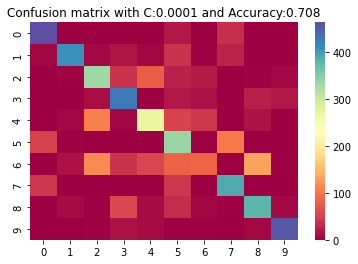

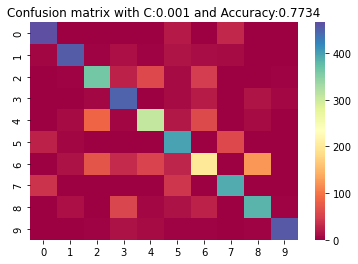

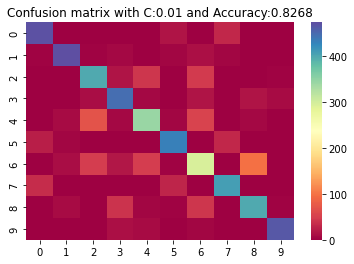

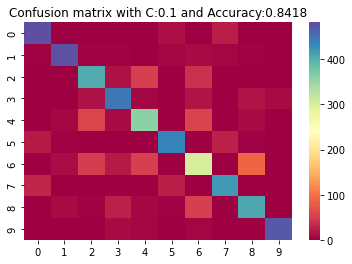

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


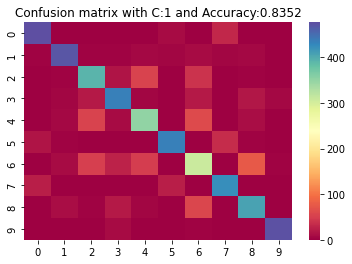

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


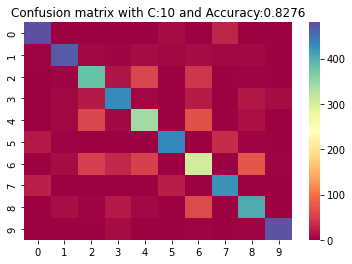

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


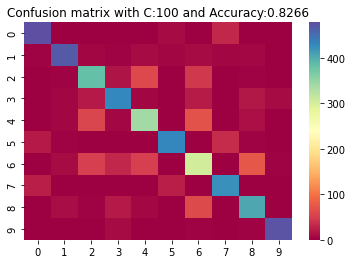

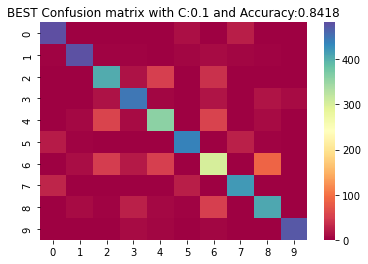

Logistic regression with C from [0.001 to 100] performed better than KNN, Naives bayes, CART and Random Forest


In [32]:
#Logistic Regression with Ridge regularization
best_accuracy = 0
for c in [0.0001,0.001,0.01,0.1,1,10,100]:
    logr = LogisticRegression(penalty='l2', C=c, solver='sag')
    logr.fit(X_train, Y_train)
    Y_pred = logr.predict(X_test)
    Y_pred_prob = logr.predict_proba(X_test)
    
    Conf = confusion_matrix(Y_test, Y_pred)
    accuracy = accuracy_score(Y_test, Y_pred)
    sb.heatmap(Conf, cmap='Spectral')
    plt.title(f"Confusion matrix with C:{c} and Accuracy:{accuracy}")
    plt.show()
    
    if (accuracy > best_accuracy):
        best_accuracy = accuracy 
        best_c = c
        best_conf = Conf

sb.heatmap(best_conf, cmap='Spectral')
plt.title(f"BEST Confusion matrix with C:{best_c} and Accuracy:{best_accuracy}")
plt.show()


Do you want to see feature importance (y/n)?y


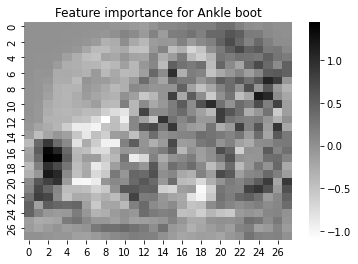

Hit Entery


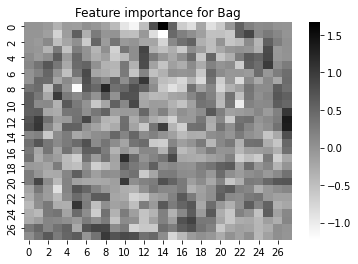

Hit Entery


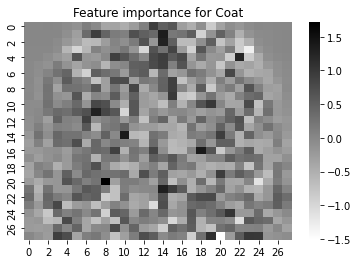

Hit Entery


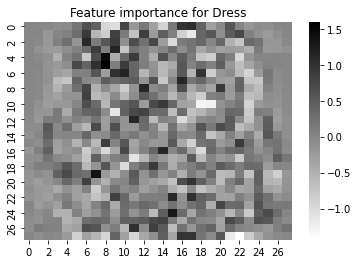

Hit Entery


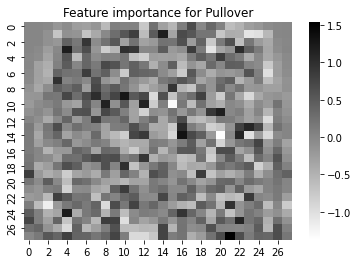

Hit Entery


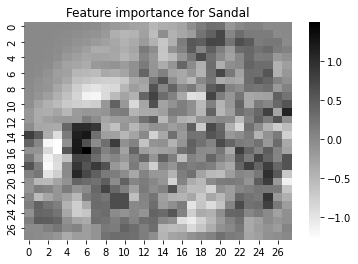

Hit Entery


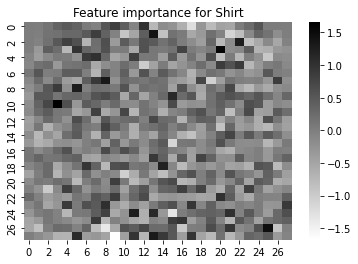

Hit Entery


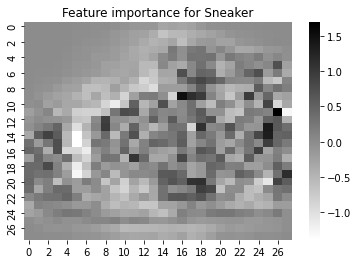

Hit Entery


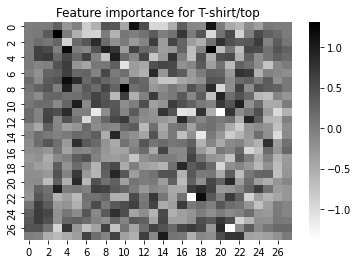

Hit Entery


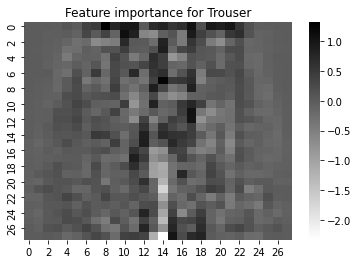

Hit Entery


In [33]:
#Feature Importance
answer = input("Do you want to see feature importance (y/n)?")
if not answer in ['n','N']:
    for i in range(logr.coef_.shape[0]):
        sb.heatmap(logr.coef_[i,:].reshape(28,28), cmap= plt.cm.binary)
        plt.title(f"Feature importance for {name[i]}")
        plt.show()
        input('Hit Enter')

Do you wish to see performance on the next test image? y/ny


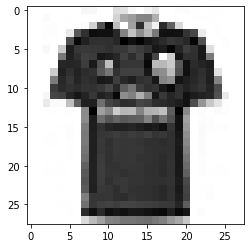

Actual value:  T-shirt/top   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.01 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.34 
p(7):  0.00 
p(8):  0.65 
p(9):  0.00 


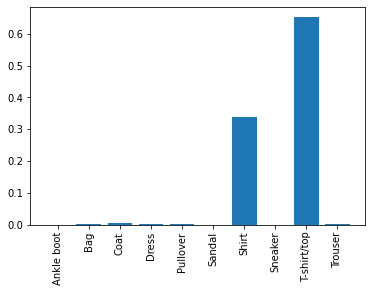

Do you wish to see performance on the next test image? y/ny


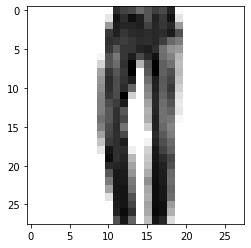

Actual value:  Trouser   predicted value:  Trouser
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.99 


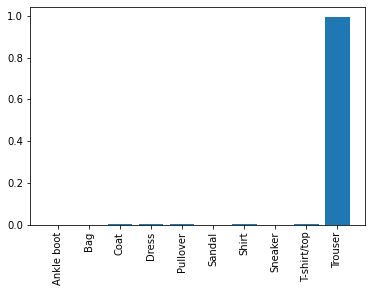

Do you wish to see performance on the next test image? y/ny


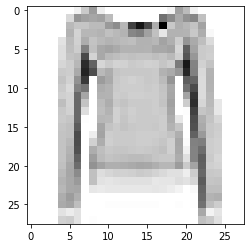

Actual value:  Pullover   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.01 
p(1):  0.01 
p(2):  0.03 
p(3):  0.08 
p(4):  0.11 
p(5):  0.01 
p(6):  0.65 
p(7):  0.00 
p(8):  0.09 
p(9):  0.02 


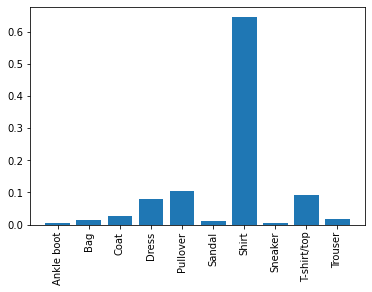

Do you wish to see performance on the next test image? y/ny


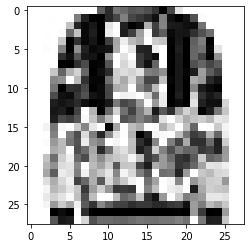

Actual value:  Pullover   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.01 
p(3):  0.01 
p(4):  0.03 
p(5):  0.00 
p(6):  0.85 
p(7):  0.00 
p(8):  0.09 
p(9):  0.00 


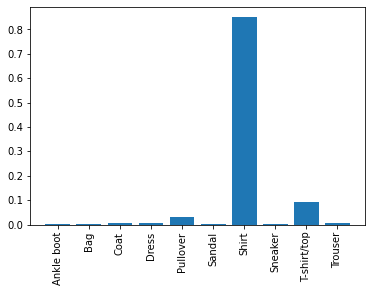

Do you wish to see performance on the next test image? y/ny


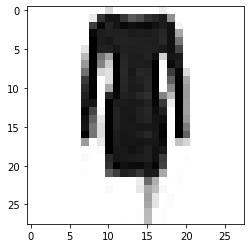

Actual value:  Dress   predicted value:  Dress
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.37 
p(3):  0.37 
p(4):  0.03 
p(5):  0.00 
p(6):  0.14 
p(7):  0.00 
p(8):  0.02 
p(9):  0.05 


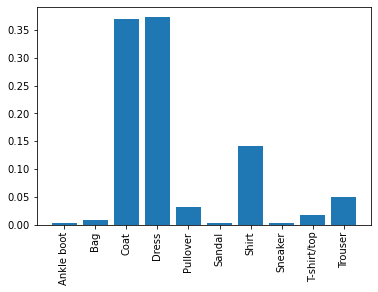

Do you wish to see performance on the next test image? y/ny


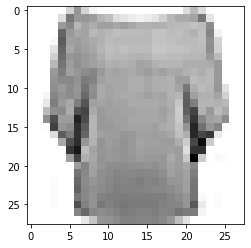

Actual value:  Pullover   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.05 
p(2):  0.01 
p(3):  0.03 
p(4):  0.07 
p(5):  0.00 
p(6):  0.19 
p(7):  0.00 
p(8):  0.65 
p(9):  0.00 


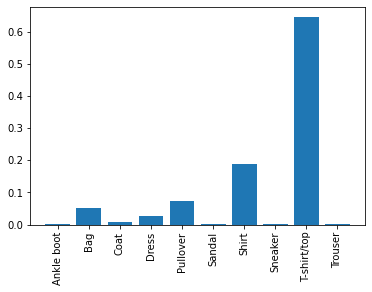

Do you wish to see performance on the next test image? y/ny


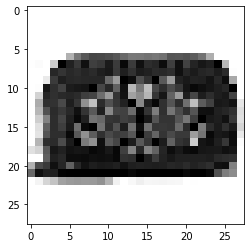

Actual value:  Bag   predicted value:  Bag
Predicted probability distribution:

p(0):  0.00 
p(1):  0.93 
p(2):  0.01 
p(3):  0.00 
p(4):  0.03 
p(5):  0.00 
p(6):  0.01 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


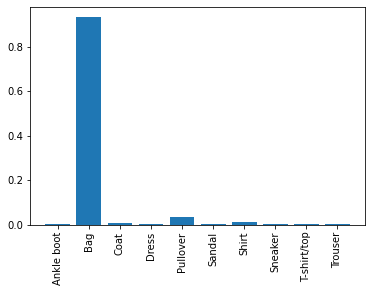

Do you wish to see performance on the next test image? y/ny


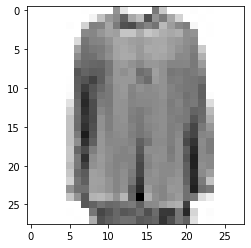

Actual value:  Shirt   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.00 
p(1):  0.03 
p(2):  0.08 
p(3):  0.11 
p(4):  0.20 
p(5):  0.00 
p(6):  0.42 
p(7):  0.00 
p(8):  0.15 
p(9):  0.00 


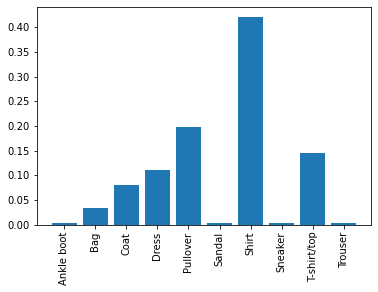

Do you wish to see performance on the next test image? y/ny


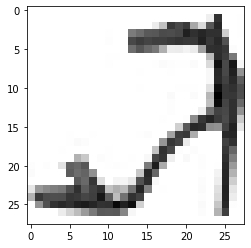

Actual value:  Sandal   predicted value:  Sandal
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  1.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


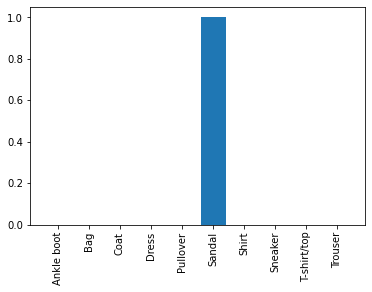

Do you wish to see performance on the next test image? y/ny


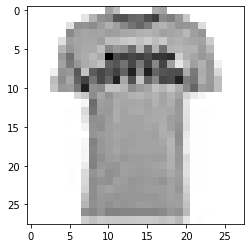

Actual value:  T-shirt/top   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.02 
p(4):  0.01 
p(5):  0.00 
p(6):  0.16 
p(7):  0.00 
p(8):  0.80 
p(9):  0.01 


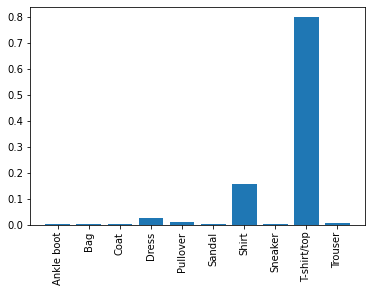

Do you wish to see performance on the next test image? y/ny


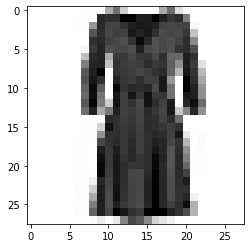

Actual value:  Dress   predicted value:  Dress
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.93 
p(4):  0.01 
p(5):  0.00 
p(6):  0.04 
p(7):  0.00 
p(8):  0.01 
p(9):  0.01 


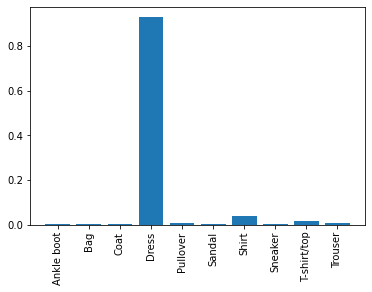

Do you wish to see performance on the next test image? y/nn


In [40]:
#For each image showing image, pred and true
for i in range(len(Y_test)):    
    if input("Do you wish to see performance on the next test image? y/n")=='n':       
        break    
    plt.imshow(np.array(X_test.iloc[i]).reshape((28,28)),cmap=plt.cm.binary)    
    plt.show()    
    print("Actual value: ",Y_test[i], "  predicted value: ", Y_pred[i])    
    print("Predicted probability distribution:\n")    
    [print("p(%d): %5.2f "% (j, Y_pred_prob[i,j])) for j in range(Y_pred_prob.shape[1])]    
    plt.bar(height=Y_pred_prob[i],x=name)
    plt.xticks(rotation = 90)
    plt.show()


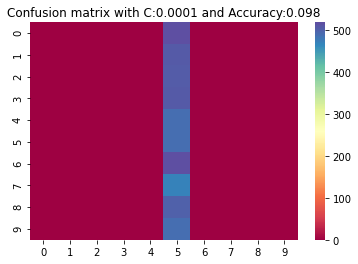

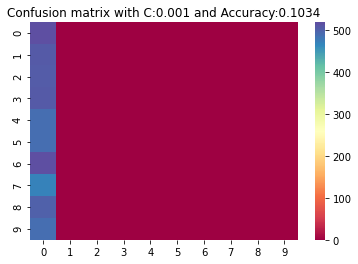

/Users/darklord/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


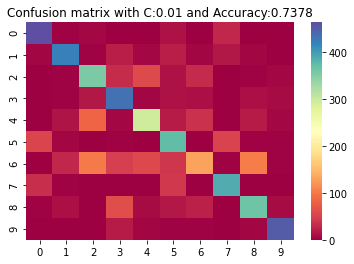

/Users/darklord/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


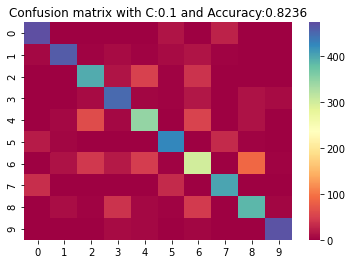

/Users/darklord/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


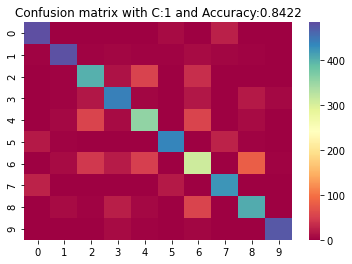

/Users/darklord/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


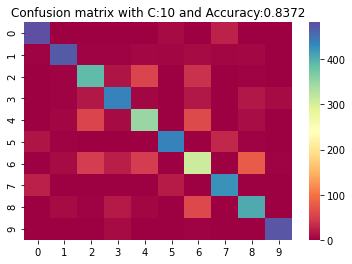

/Users/darklord/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


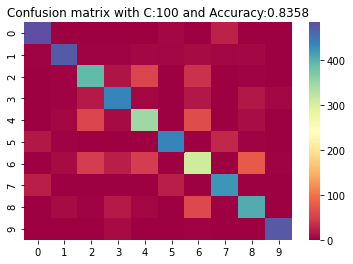

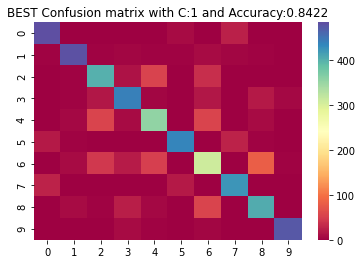

Logistic regression with C from [0.001 to 100] performed better than KNN, Naives bayes, CART and Random Forest


In [54]:
#Logistic Regression with LASSO regulaization
best_accuracy = 0
for c in [0.0001,0.001,0.01,0.1,1,10,100]:
    logr = LogisticRegression(penalty='l1', C=c, solver='saga')
    logr.fit(X_train, Y_train)
    Y_pred = logr.predict(X_test)
    Y_pred_prob = logr.predict_proba(X_test)
    
    Conf = confusion_matrix(Y_test, Y_pred)
    accuracy = accuracy_score(Y_test, Y_pred)
    sb.heatmap(Conf, cmap='Spectral')
    plt.title(f"Confusion matrix with C:{c} and Accuracy:{accuracy}")
    plt.show()
    
    if (accuracy > best_accuracy):
        best_accuracy = accuracy 
        best_c = c
        best_conf = Conf

sb.heatmap(best_conf, cmap='Spectral')
plt.title(f"BEST Confusion matrix with C:{best_c} and Accuracy:{best_accuracy}")
plt.show()


Do you want to see feature importance (y/n)?y


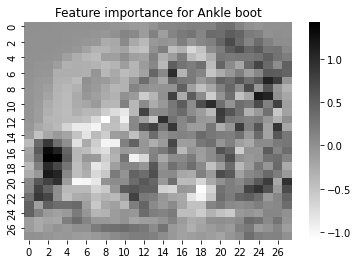

Hit Enter


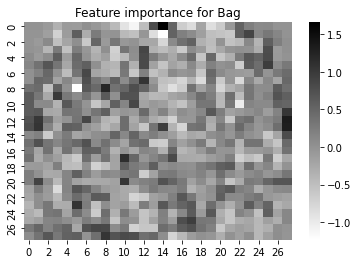

Hit Enter


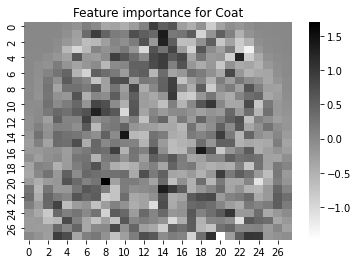

Hit Entery


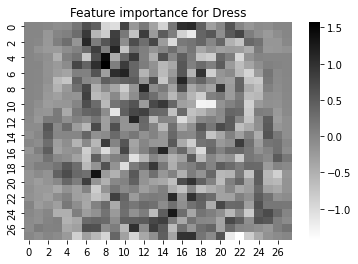

Hit Entery


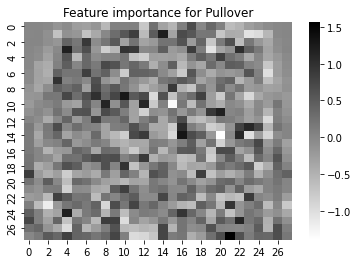

Hit Entery


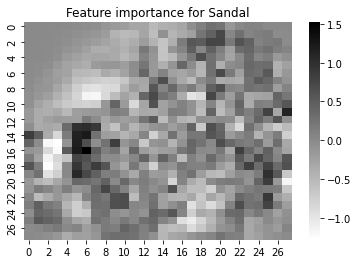

Hit Entery


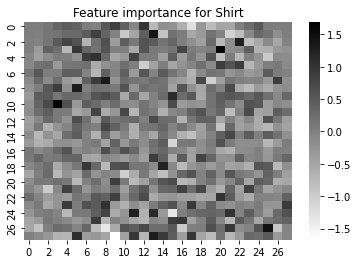

Hit Entery


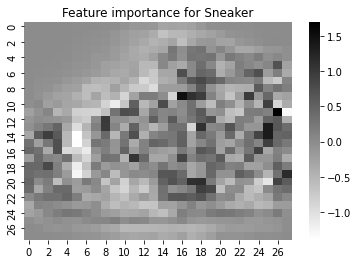

Hit Entery


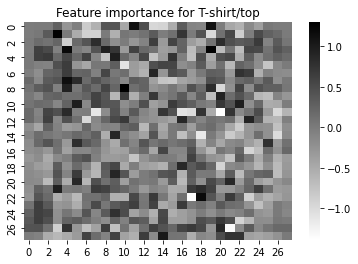

Hit Entery


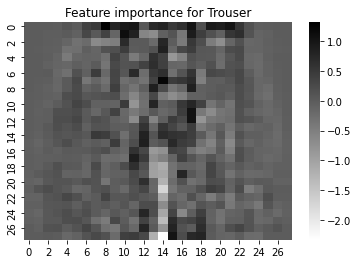

Hit Entery


In [30]:
#Feature Importance
answer = input("Do you want to see feature importance (y/n)?")
if not answer in ['n','N']:
    for i in range(logr.coef_.shape[0]):
        sb.heatmap(logr.coef_[i,:].reshape(28,28), cmap= plt.cm.binary)
        plt.title(f"Feature importance for {name[i]}")
        plt.show()
        input('Hit Enter')



Do you wish to see performance on the next test image? y/ny


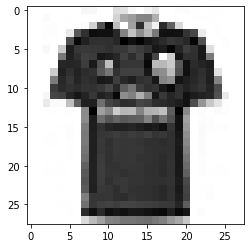

Actual value:  T-shirt/top   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.01 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.34 
p(7):  0.00 
p(8):  0.65 
p(9):  0.00 


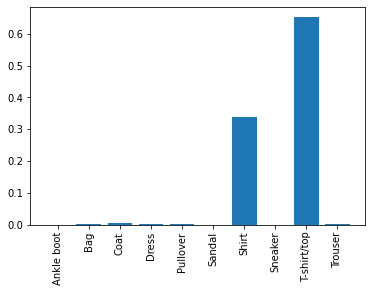

Do you wish to see performance on the next test image? y/ny


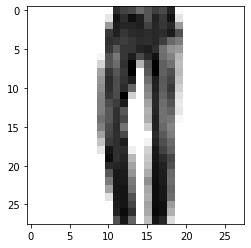

Actual value:  Trouser   predicted value:  Trouser
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.99 


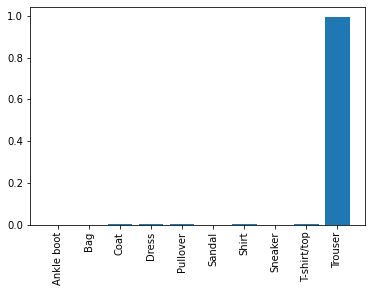

Do you wish to see performance on the next test image? y/ny


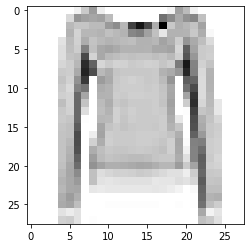

Actual value:  Pullover   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.01 
p(1):  0.01 
p(2):  0.03 
p(3):  0.08 
p(4):  0.11 
p(5):  0.01 
p(6):  0.65 
p(7):  0.00 
p(8):  0.09 
p(9):  0.02 


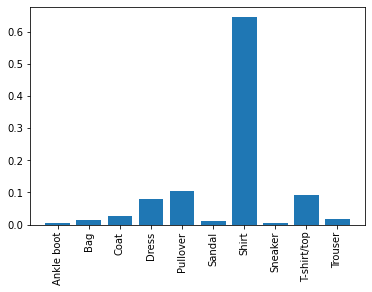

Do you wish to see performance on the next test image? y/ny


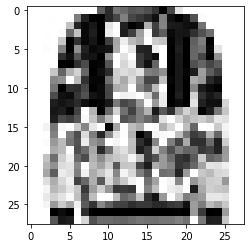

Actual value:  Pullover   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.01 
p(3):  0.01 
p(4):  0.03 
p(5):  0.00 
p(6):  0.85 
p(7):  0.00 
p(8):  0.09 
p(9):  0.00 


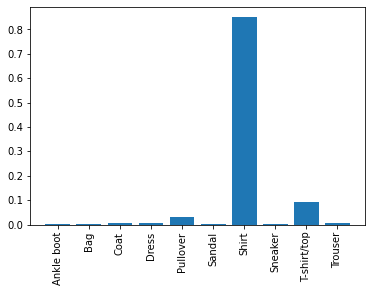

Do you wish to see performance on the next test image? y/ny


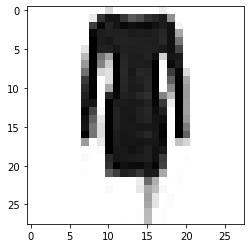

Actual value:  Dress   predicted value:  Dress
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.37 
p(3):  0.37 
p(4):  0.03 
p(5):  0.00 
p(6):  0.14 
p(7):  0.00 
p(8):  0.02 
p(9):  0.05 


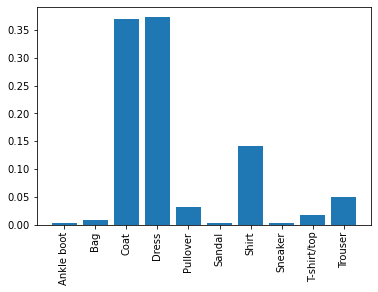

Do you wish to see performance on the next test image? y/ny


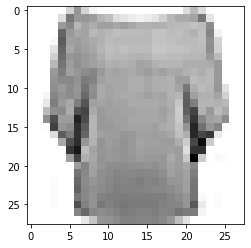

Actual value:  Pullover   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.05 
p(2):  0.01 
p(3):  0.03 
p(4):  0.07 
p(5):  0.00 
p(6):  0.19 
p(7):  0.00 
p(8):  0.65 
p(9):  0.00 


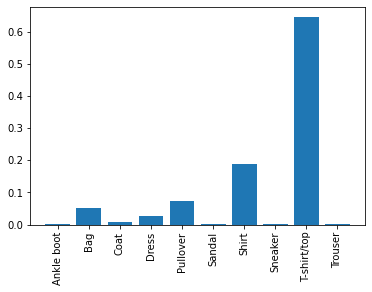

Do you wish to see performance on the next test image? y/ny


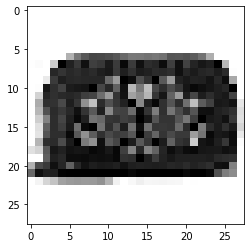

Actual value:  Bag   predicted value:  Bag
Predicted probability distribution:

p(0):  0.00 
p(1):  0.93 
p(2):  0.01 
p(3):  0.00 
p(4):  0.03 
p(5):  0.00 
p(6):  0.01 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


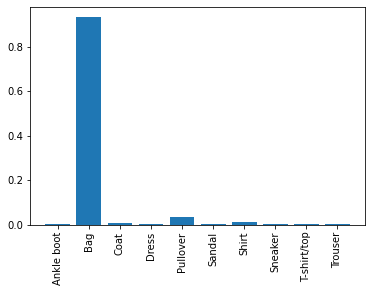

Do you wish to see performance on the next test image? y/ny


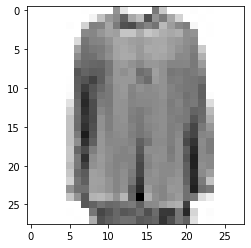

Actual value:  Shirt   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.00 
p(1):  0.03 
p(2):  0.08 
p(3):  0.11 
p(4):  0.20 
p(5):  0.00 
p(6):  0.42 
p(7):  0.00 
p(8):  0.15 
p(9):  0.00 


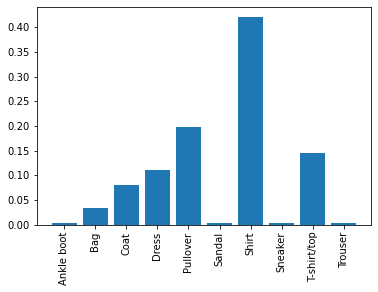

Do you wish to see performance on the next test image? y/ny


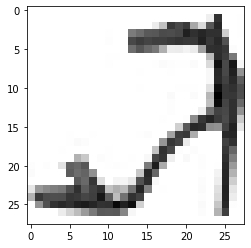

Actual value:  Sandal   predicted value:  Sandal
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  1.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


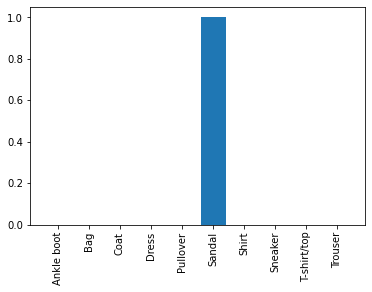

Do you wish to see performance on the next test image? y/ny


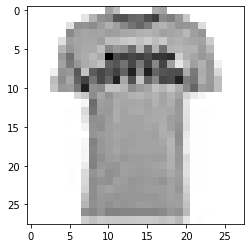

Actual value:  T-shirt/top   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.02 
p(4):  0.01 
p(5):  0.00 
p(6):  0.16 
p(7):  0.00 
p(8):  0.80 
p(9):  0.01 


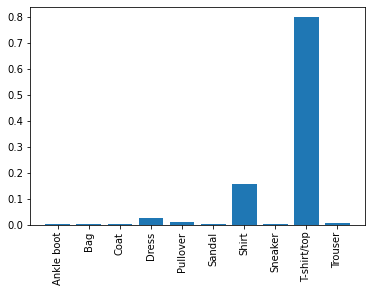

Do you wish to see performance on the next test image? y/ny


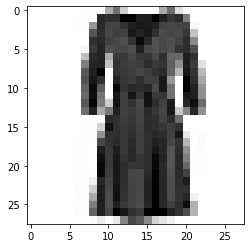

Actual value:  Dress   predicted value:  Dress
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.93 
p(4):  0.01 
p(5):  0.00 
p(6):  0.04 
p(7):  0.00 
p(8):  0.01 
p(9):  0.01 


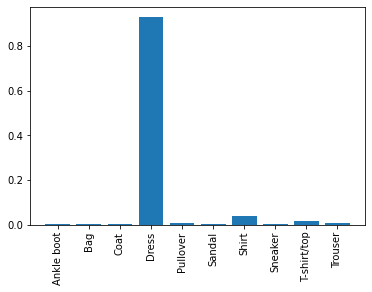

Do you wish to see performance on the next test image? y/ny


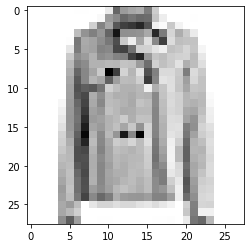

Actual value:  Coat   predicted value:  Pullover
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.14 
p(3):  0.02 
p(4):  0.54 
p(5):  0.00 
p(6):  0.21 
p(7):  0.00 
p(8):  0.06 
p(9):  0.01 


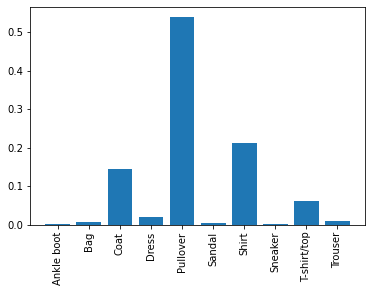

Do you wish to see performance on the next test image? y/ny


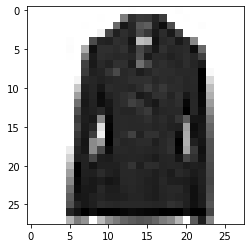

Actual value:  Coat   predicted value:  Coat
Predicted probability distribution:

p(0):  0.01 
p(1):  0.05 
p(2):  0.28 
p(3):  0.03 
p(4):  0.19 
p(5):  0.01 
p(6):  0.33 
p(7):  0.01 
p(8):  0.07 
p(9):  0.02 


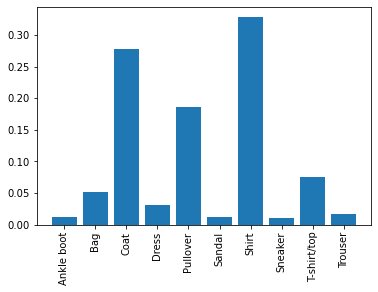

Do you wish to see performance on the next test image? y/nn


In [41]:
#For each image showing image, pred and true
for i in range(len(Y_test)):    
    if input("Do you wish to see performance on the next test image? y/n")=='n':       
        break    
    plt.imshow(np.array(X_test.iloc[i]).reshape((28,28)),cmap=plt.cm.binary)    
    plt.show()    
    print("Actual value: ",Y_test[i], "  predicted value: ", Y_pred[i])    
    print("Predicted probability distribution:\n")    
    [print("p(%d): %5.2f "% (j, Y_pred_prob[i,j])) for j in range(Y_pred_prob.shape[1])]    
    plt.bar(height=Y_pred_prob[i],x=name)
    plt.xticks(rotation = 90)
    plt.show()

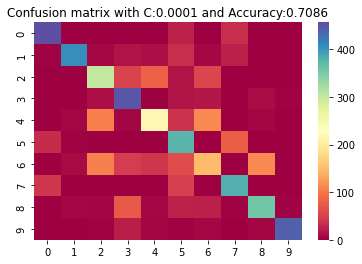

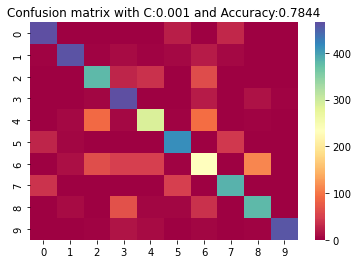

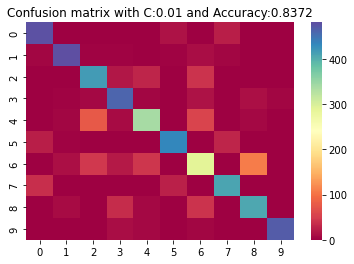

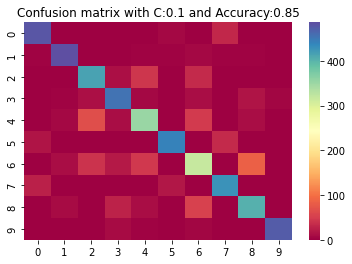

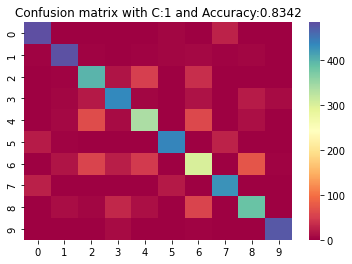

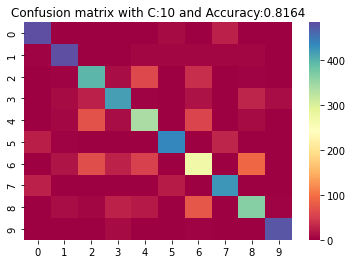

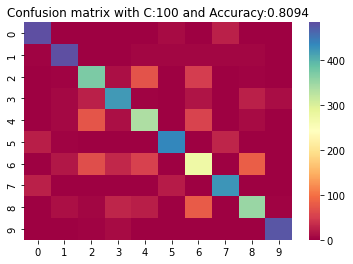

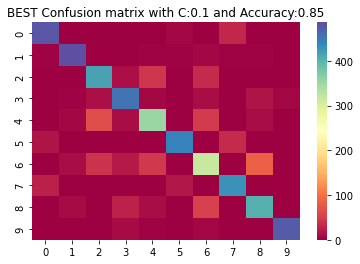

In [39]:
#SVM Linear
best_accuracy = 0
for c in [0.0001,0.001,0.01,0.1,1,10,100]:
    svm = SVC(kernel='linear', C=c, probability=True)
    svm.fit(X_train, Y_train)
    Y_pred = svm.predict(X_test)
    Y_pred_prob = svm.predict_proba(X_test)
    
    Conf = confusion_matrix(Y_test, Y_pred)
    accuracy = accuracy_score(Y_test, Y_pred)
    sb.heatmap(Conf, cmap='Spectral')
    plt.title(f"Confusion matrix with C:{c} and Accuracy:{accuracy}")
    plt.show()
    
    if (accuracy > best_accuracy):
        best_accuracy = accuracy 
        best_c = c
        best_conf = Conf

sb.heatmap(best_conf, cmap='Spectral')
plt.title(f"BEST Confusion matrix with C:{best_c} and Accuracy:{best_accuracy}")
plt.show()


Do you wish to see performance on the next test image? y/ny


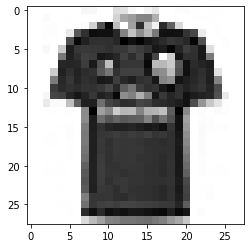

Actual value:  T-shirt/top   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.01 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.34 
p(7):  0.00 
p(8):  0.65 
p(9):  0.00 


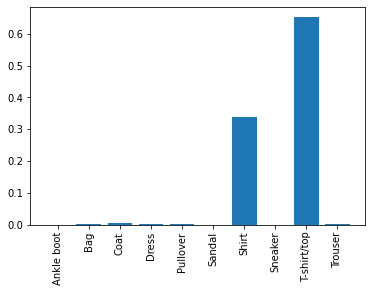

Do you wish to see performance on the next test image? y/ny


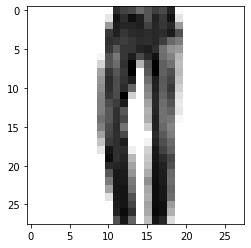

Actual value:  Trouser   predicted value:  Trouser
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.99 


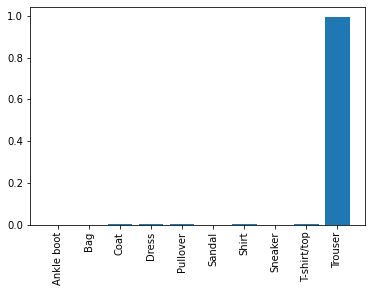

Do you wish to see performance on the next test image? y/ny


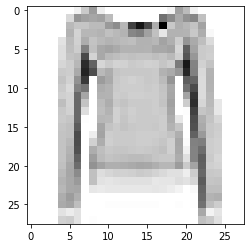

Actual value:  Pullover   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.01 
p(1):  0.01 
p(2):  0.03 
p(3):  0.08 
p(4):  0.11 
p(5):  0.01 
p(6):  0.65 
p(7):  0.00 
p(8):  0.09 
p(9):  0.02 


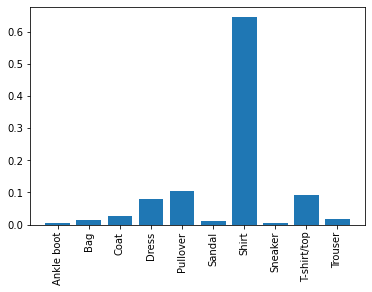

Do you wish to see performance on the next test image? y/ny


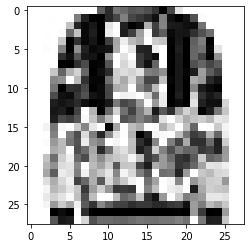

Actual value:  Pullover   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.01 
p(3):  0.01 
p(4):  0.03 
p(5):  0.00 
p(6):  0.85 
p(7):  0.00 
p(8):  0.09 
p(9):  0.00 


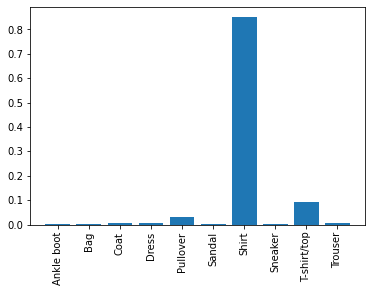

Do you wish to see performance on the next test image? y/ny


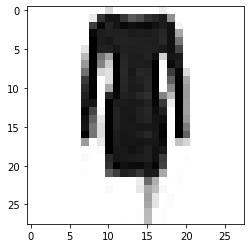

Actual value:  Dress   predicted value:  Dress
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.37 
p(3):  0.37 
p(4):  0.03 
p(5):  0.00 
p(6):  0.14 
p(7):  0.00 
p(8):  0.02 
p(9):  0.05 


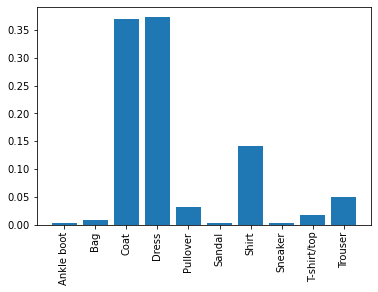

Do you wish to see performance on the next test image? y/ny


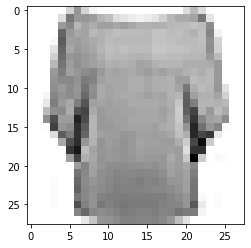

Actual value:  Pullover   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.05 
p(2):  0.01 
p(3):  0.03 
p(4):  0.07 
p(5):  0.00 
p(6):  0.19 
p(7):  0.00 
p(8):  0.65 
p(9):  0.00 


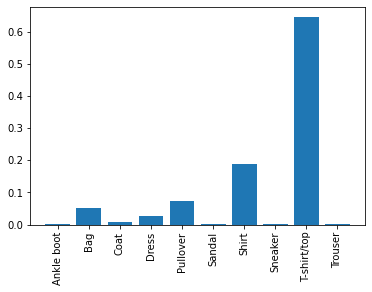

Do you wish to see performance on the next test image? y/ny


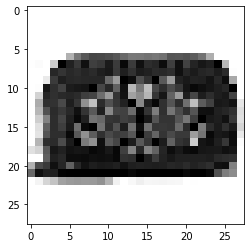

Actual value:  Bag   predicted value:  Bag
Predicted probability distribution:

p(0):  0.00 
p(1):  0.93 
p(2):  0.01 
p(3):  0.00 
p(4):  0.03 
p(5):  0.00 
p(6):  0.01 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


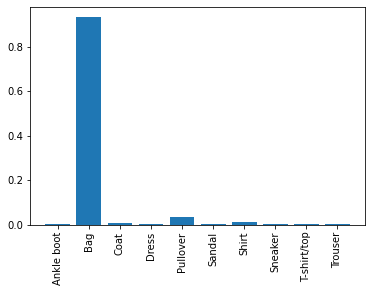

Do you wish to see performance on the next test image? y/ny


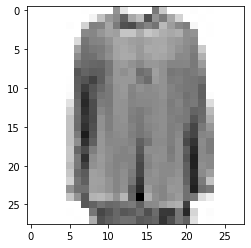

Actual value:  Shirt   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.00 
p(1):  0.03 
p(2):  0.08 
p(3):  0.11 
p(4):  0.20 
p(5):  0.00 
p(6):  0.42 
p(7):  0.00 
p(8):  0.15 
p(9):  0.00 


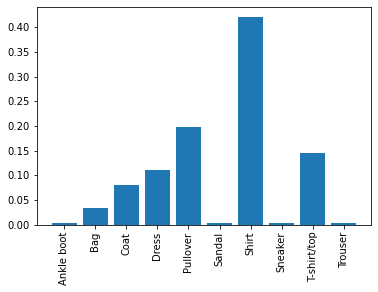

Do you wish to see performance on the next test image? y/ny


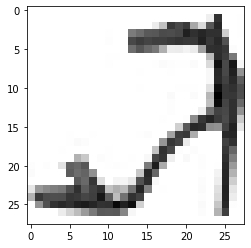

Actual value:  Sandal   predicted value:  Sandal
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  1.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


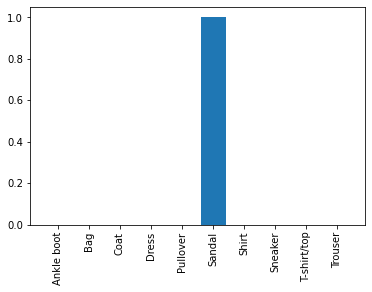

Do you wish to see performance on the next test image? y/ny


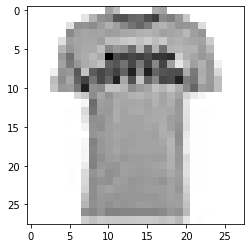

Actual value:  T-shirt/top   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.02 
p(4):  0.01 
p(5):  0.00 
p(6):  0.16 
p(7):  0.00 
p(8):  0.80 
p(9):  0.01 


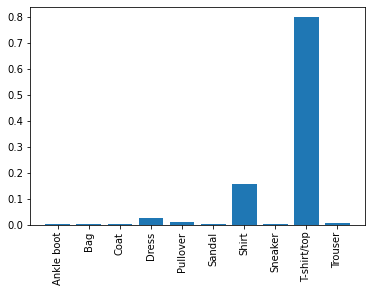

Do you wish to see performance on the next test image? y/ny


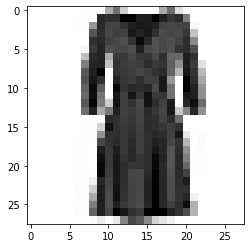

Actual value:  Dress   predicted value:  Dress
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.93 
p(4):  0.01 
p(5):  0.00 
p(6):  0.04 
p(7):  0.00 
p(8):  0.01 
p(9):  0.01 


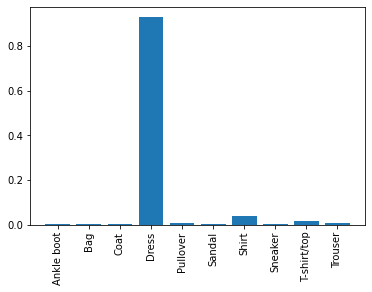

Do you wish to see performance on the next test image? y/ny


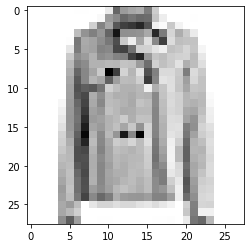

Actual value:  Coat   predicted value:  Pullover
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.14 
p(3):  0.02 
p(4):  0.54 
p(5):  0.00 
p(6):  0.21 
p(7):  0.00 
p(8):  0.06 
p(9):  0.01 


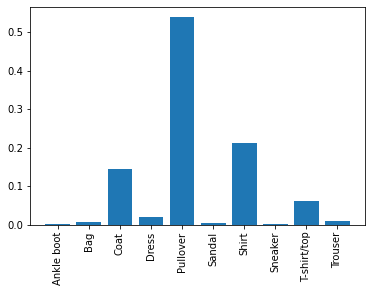

Do you wish to see performance on the next test image? y/ny


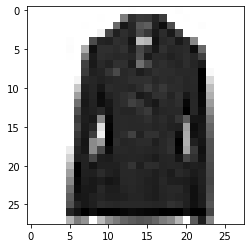

Actual value:  Coat   predicted value:  Coat
Predicted probability distribution:

p(0):  0.01 
p(1):  0.05 
p(2):  0.28 
p(3):  0.03 
p(4):  0.19 
p(5):  0.01 
p(6):  0.33 
p(7):  0.01 
p(8):  0.07 
p(9):  0.02 


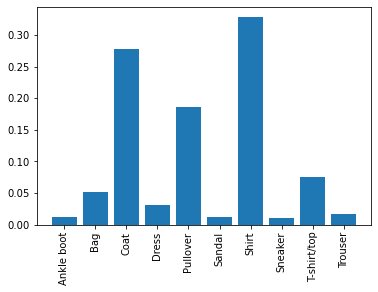

Do you wish to see performance on the next test image? y/ny


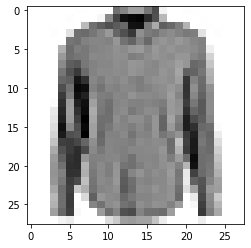

Actual value:  Shirt   predicted value:  Coat
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.49 
p(3):  0.02 
p(4):  0.21 
p(5):  0.00 
p(6):  0.23 
p(7):  0.00 
p(8):  0.02 
p(9):  0.01 


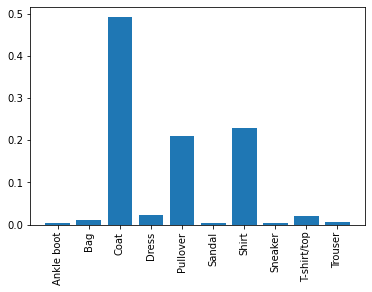

Do you wish to see performance on the next test image? y/ny


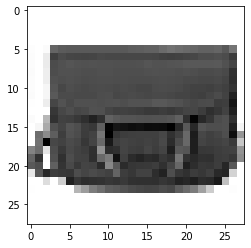

Actual value:  Bag   predicted value:  Bag
Predicted probability distribution:

p(0):  0.00 
p(1):  0.98 
p(2):  0.00 
p(3):  0.00 
p(4):  0.01 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


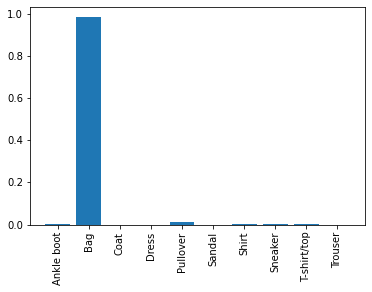

Do you wish to see performance on the next test image? y/ny


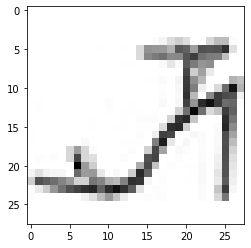

Actual value:  Sandal   predicted value:  Sandal
Predicted probability distribution:

p(0):  0.01 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.96 
p(6):  0.00 
p(7):  0.02 
p(8):  0.00 
p(9):  0.00 


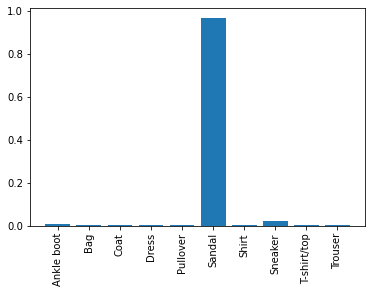

Do you wish to see performance on the next test image? y/ny


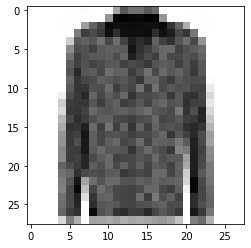

Actual value:  Shirt   predicted value:  Coat
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.69 
p(3):  0.01 
p(4):  0.08 
p(5):  0.00 
p(6):  0.22 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


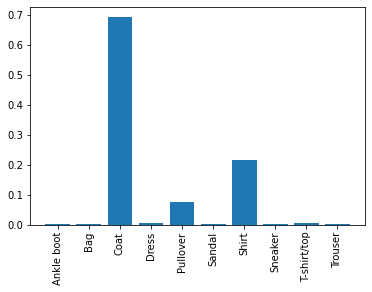

Do you wish to see performance on the next test image? y/ny


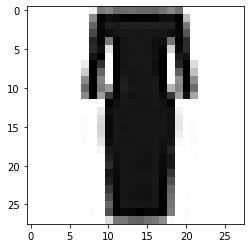

Actual value:  Dress   predicted value:  Dress
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.93 
p(4):  0.00 
p(5):  0.00 
p(6):  0.03 
p(7):  0.00 
p(8):  0.01 
p(9):  0.03 


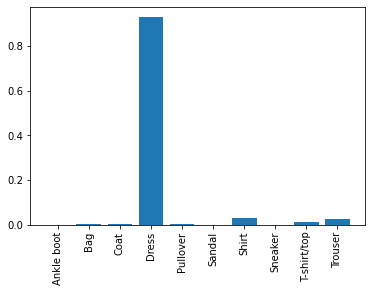

Do you wish to see performance on the next test image? y/ny


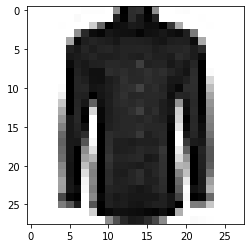

Actual value:  Shirt   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.01 
p(1):  0.03 
p(2):  0.15 
p(3):  0.03 
p(4):  0.11 
p(5):  0.01 
p(6):  0.58 
p(7):  0.01 
p(8):  0.07 
p(9):  0.01 


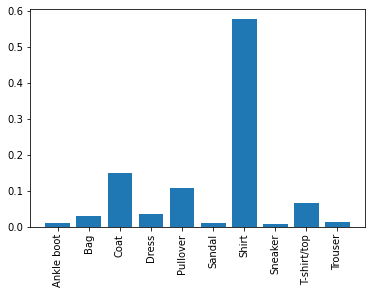

Do you wish to see performance on the next test image? y/ny


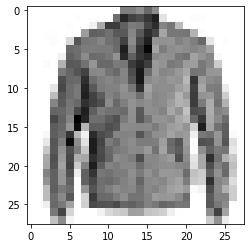

Actual value:  Coat   predicted value:  Coat
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.91 
p(3):  0.00 
p(4):  0.05 
p(5):  0.00 
p(6):  0.02 
p(7):  0.00 
p(8):  0.01 
p(9):  0.00 


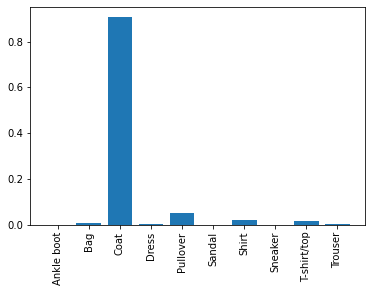

Do you wish to see performance on the next test image? y/ny


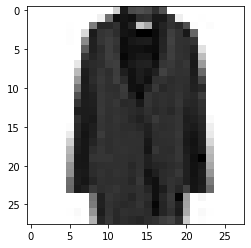

Actual value:  Coat   predicted value:  Coat
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.69 
p(3):  0.10 
p(4):  0.06 
p(5):  0.00 
p(6):  0.10 
p(7):  0.00 
p(8):  0.02 
p(9):  0.01 


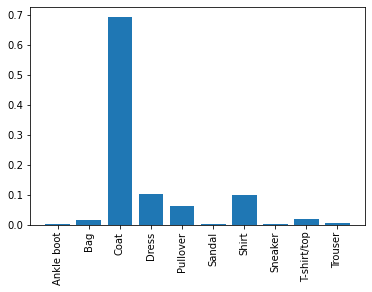

Do you wish to see performance on the next test image? y/ny


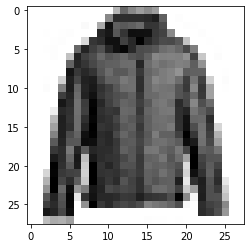

Actual value:  Coat   predicted value:  Pullover
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.30 
p(3):  0.00 
p(4):  0.69 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


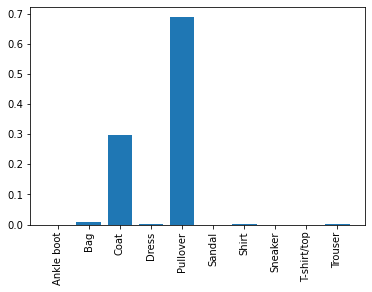

Do you wish to see performance on the next test image? y/ny


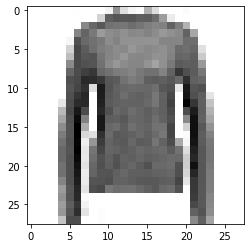

Actual value:  Pullover   predicted value:  Pullover
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.86 
p(5):  0.00 
p(6):  0.11 
p(7):  0.00 
p(8):  0.01 
p(9):  0.00 


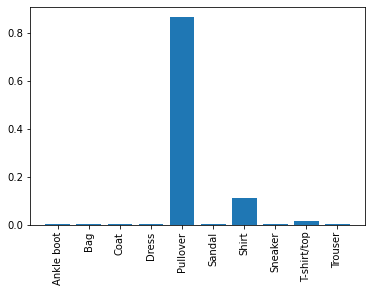

Do you wish to see performance on the next test image? y/ny


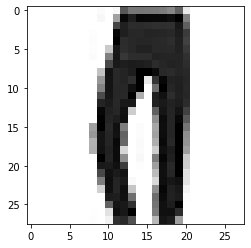

Actual value:  Trouser   predicted value:  Trouser
Predicted probability distribution:

p(0):  0.01 
p(1):  0.02 
p(2):  0.04 
p(3):  0.21 
p(4):  0.03 
p(5):  0.01 
p(6):  0.07 
p(7):  0.01 
p(8):  0.07 
p(9):  0.52 


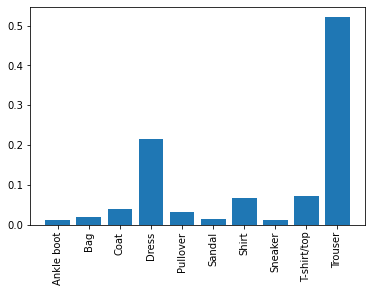

Do you wish to see performance on the next test image? y/ny


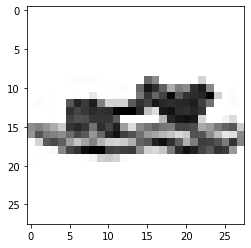

Actual value:  Sandal   predicted value:  Sandal
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.99 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


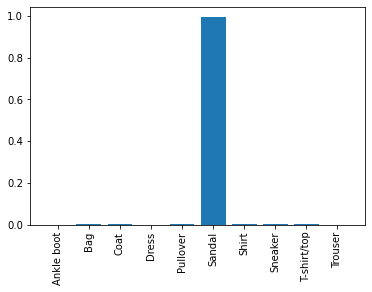

Do you wish to see performance on the next test image? y/nn


In [42]:
#For each image showing image, pred and true
for i in range(len(Y_test)):    
    if input("Do you wish to see performance on the next test image? y/n")=='n':       
        break    
    plt.imshow(np.array(X_test.iloc[i]).reshape((28,28)),cmap=plt.cm.binary)    
    plt.show()    
    print("Actual value: ",Y_test[i], "  predicted value: ", Y_pred[i])    
    print("Predicted probability distribution:\n")    
    [print("p(%d): %5.2f "% (j, Y_pred_prob[i,j])) for j in range(Y_pred_prob.shape[1])]    
    plt.bar(height=Y_pred_prob[i],x=name)
    plt.xticks(rotation = 90)
    plt.show()


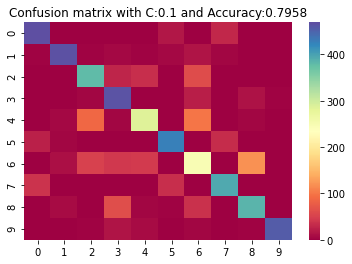

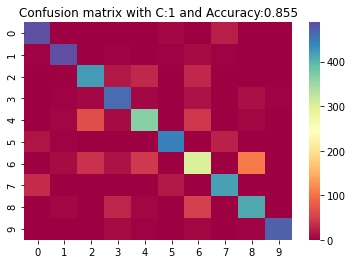

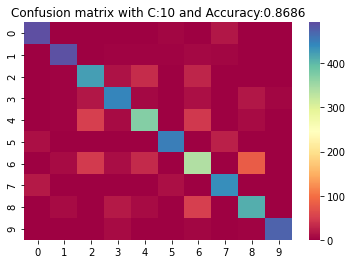

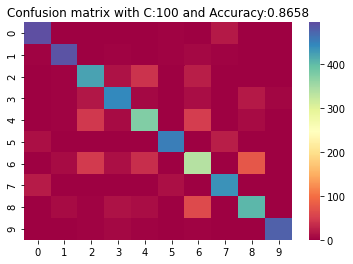

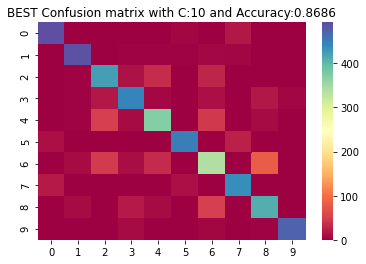

SVM RBF with C from [0.01 to 100] performed better than KNN, Naives bayes, CART and Random Forest


In [14]:
#SVM Gaussian Radial Basis function
best_accuracy = 0
for c in [0.1,1,10,100]:
    svm = SVC(kernel='rbf', C=c, probability=True)
    svm.fit(X_train, Y_train)
    Y_pred = svm.predict(X_test)
    Y_pred_prob = svm.predict_proba(X_test)
    
    Conf = confusion_matrix(Y_test, Y_pred)
    accuracy = accuracy_score(Y_test, Y_pred)
    sb.heatmap(Conf, cmap='Spectral')
    plt.title(f"Confusion matrix with C:{c} and Accuracy:{accuracy}")
    plt.show()
    
    if (accuracy > best_accuracy):
        best_accuracy = accuracy 
        best_c = c
        best_conf = Conf

sb.heatmap(best_conf, cmap='Spectral')
plt.title(f"BEST Confusion matrix with C:{best_c} and Accuracy:{best_accuracy}")
plt.show()




Do you wish to see performance on the next test image? y/ny


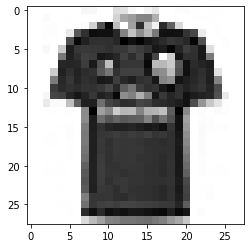

Actual value:  T-shirt/top   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.01 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.34 
p(7):  0.00 
p(8):  0.65 
p(9):  0.00 


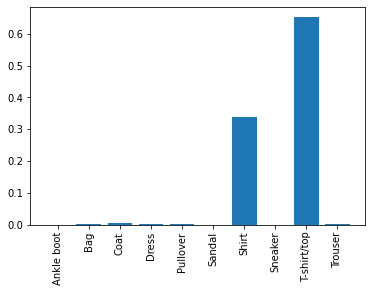

Do you wish to see performance on the next test image? y/ny


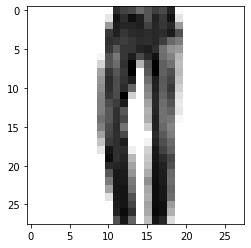

Actual value:  Trouser   predicted value:  Trouser
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.99 


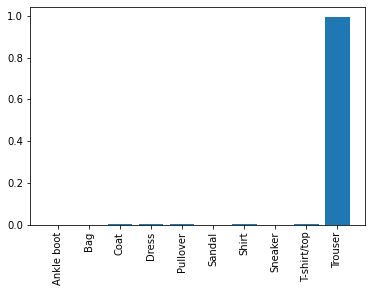

Do you wish to see performance on the next test image? y/ny


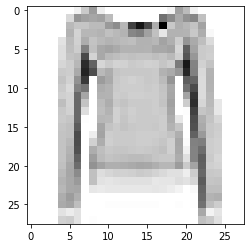

Actual value:  Pullover   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.01 
p(1):  0.01 
p(2):  0.03 
p(3):  0.08 
p(4):  0.11 
p(5):  0.01 
p(6):  0.65 
p(7):  0.00 
p(8):  0.09 
p(9):  0.02 


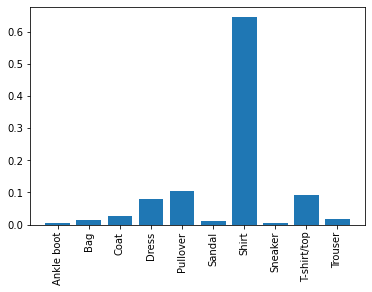

Do you wish to see performance on the next test image? y/ny


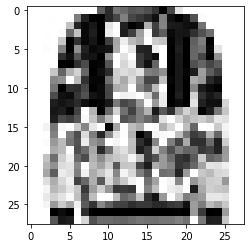

Actual value:  Pullover   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.01 
p(3):  0.01 
p(4):  0.03 
p(5):  0.00 
p(6):  0.85 
p(7):  0.00 
p(8):  0.09 
p(9):  0.00 


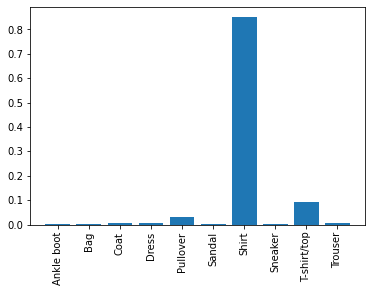

Do you wish to see performance on the next test image? y/ny


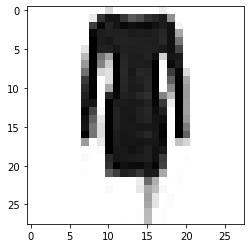

Actual value:  Dress   predicted value:  Dress
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.37 
p(3):  0.37 
p(4):  0.03 
p(5):  0.00 
p(6):  0.14 
p(7):  0.00 
p(8):  0.02 
p(9):  0.05 


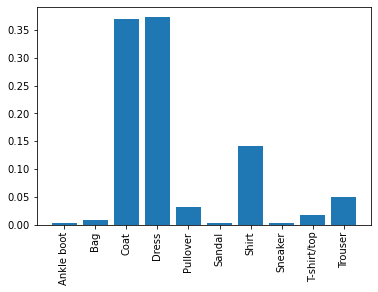

Do you wish to see performance on the next test image? y/ny


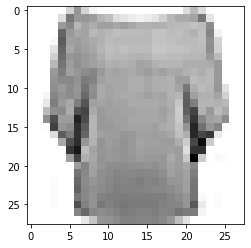

Actual value:  Pullover   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.05 
p(2):  0.01 
p(3):  0.03 
p(4):  0.07 
p(5):  0.00 
p(6):  0.19 
p(7):  0.00 
p(8):  0.65 
p(9):  0.00 


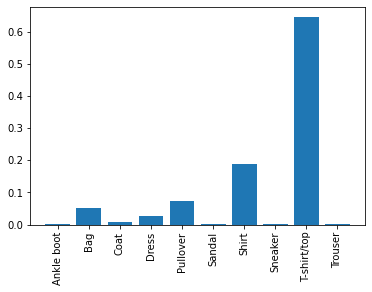

Do you wish to see performance on the next test image? y/ny


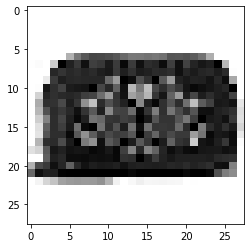

Actual value:  Bag   predicted value:  Bag
Predicted probability distribution:

p(0):  0.00 
p(1):  0.93 
p(2):  0.01 
p(3):  0.00 
p(4):  0.03 
p(5):  0.00 
p(6):  0.01 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


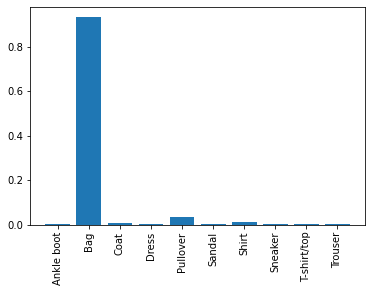

Do you wish to see performance on the next test image? y/ny


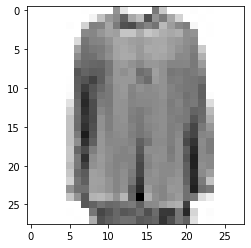

Actual value:  Shirt   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.00 
p(1):  0.03 
p(2):  0.08 
p(3):  0.11 
p(4):  0.20 
p(5):  0.00 
p(6):  0.42 
p(7):  0.00 
p(8):  0.15 
p(9):  0.00 


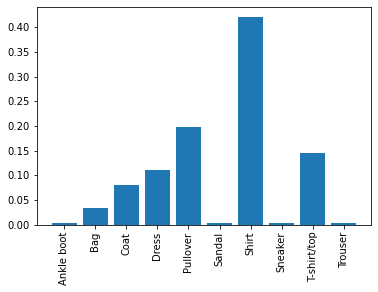

Do you wish to see performance on the next test image? y/ny


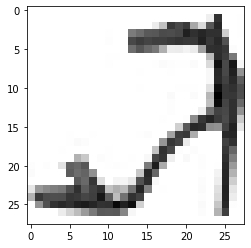

Actual value:  Sandal   predicted value:  Sandal
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  1.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


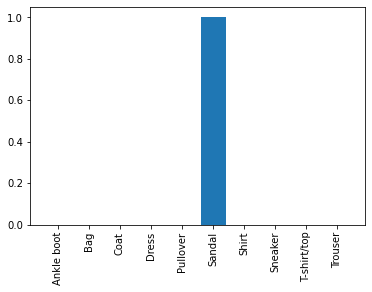

Do you wish to see performance on the next test image? y/ny


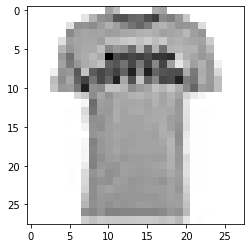

Actual value:  T-shirt/top   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.02 
p(4):  0.01 
p(5):  0.00 
p(6):  0.16 
p(7):  0.00 
p(8):  0.80 
p(9):  0.01 


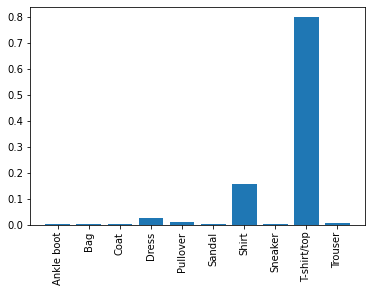

Do you wish to see performance on the next test image? y/ny


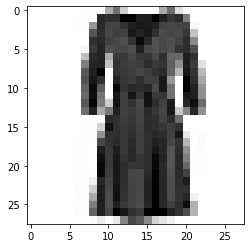

Actual value:  Dress   predicted value:  Dress
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.93 
p(4):  0.01 
p(5):  0.00 
p(6):  0.04 
p(7):  0.00 
p(8):  0.01 
p(9):  0.01 


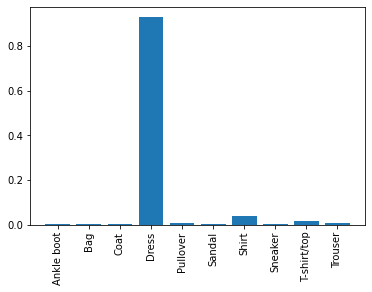

Do you wish to see performance on the next test image? y/ny


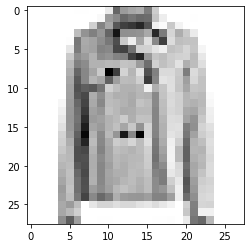

Actual value:  Coat   predicted value:  Pullover
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.14 
p(3):  0.02 
p(4):  0.54 
p(5):  0.00 
p(6):  0.21 
p(7):  0.00 
p(8):  0.06 
p(9):  0.01 


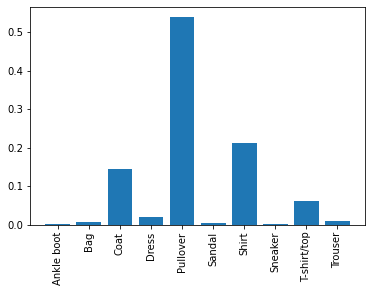

Do you wish to see performance on the next test image? y/ny


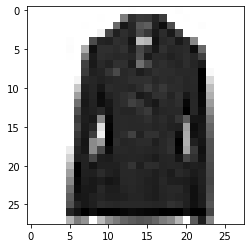

Actual value:  Coat   predicted value:  Coat
Predicted probability distribution:

p(0):  0.01 
p(1):  0.05 
p(2):  0.28 
p(3):  0.03 
p(4):  0.19 
p(5):  0.01 
p(6):  0.33 
p(7):  0.01 
p(8):  0.07 
p(9):  0.02 


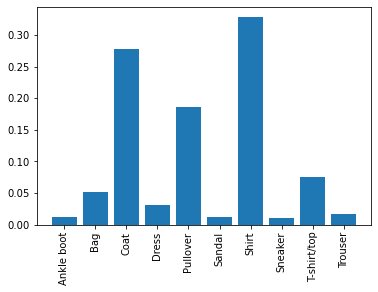

Do you wish to see performance on the next test image? y/ny


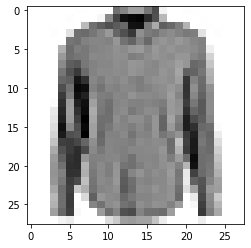

Actual value:  Shirt   predicted value:  Coat
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.49 
p(3):  0.02 
p(4):  0.21 
p(5):  0.00 
p(6):  0.23 
p(7):  0.00 
p(8):  0.02 
p(9):  0.01 


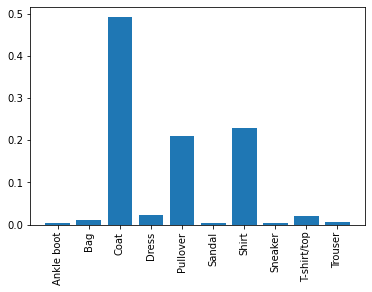

Do you wish to see performance on the next test image? y/ny


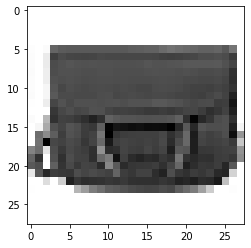

Actual value:  Bag   predicted value:  Bag
Predicted probability distribution:

p(0):  0.00 
p(1):  0.98 
p(2):  0.00 
p(3):  0.00 
p(4):  0.01 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


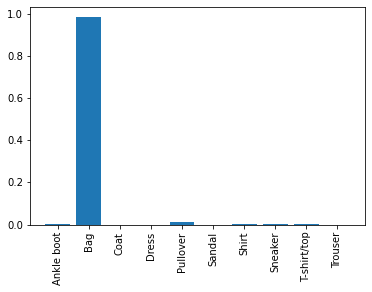

Do you wish to see performance on the next test image? y/ny


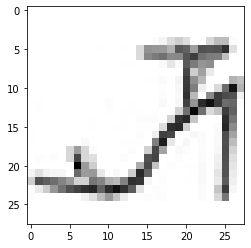

Actual value:  Sandal   predicted value:  Sandal
Predicted probability distribution:

p(0):  0.01 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.96 
p(6):  0.00 
p(7):  0.02 
p(8):  0.00 
p(9):  0.00 


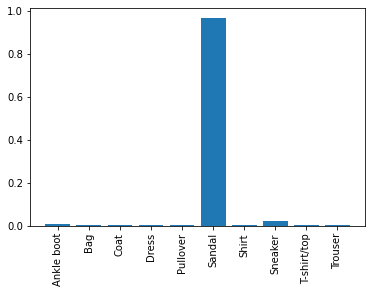

Do you wish to see performance on the next test image? y/ny


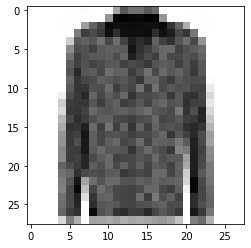

Actual value:  Shirt   predicted value:  Coat
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.69 
p(3):  0.01 
p(4):  0.08 
p(5):  0.00 
p(6):  0.22 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


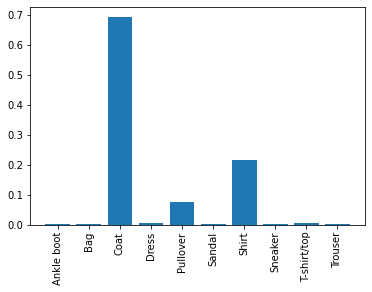

Do you wish to see performance on the next test image? y/nn


In [43]:
#For each image showing image, pred and true
for i in range(len(Y_test)):    
    if input("Do you wish to see performance on the next test image? y/n")=='n':       
        break    
    plt.imshow(np.array(X_test.iloc[i]).reshape((28,28)),cmap=plt.cm.binary)    
    plt.show()    
    print("Actual value: ",Y_test[i], "  predicted value: ", Y_pred[i])    
    print("Predicted probability distribution:\n")    
    [print("p(%d): %5.2f "% (j, Y_pred_prob[i,j])) for j in range(Y_pred_prob.shape[1])]    
    plt.bar(height=Y_pred_prob[i],x=name)
    plt.xticks(rotation = 90)
    plt.show()


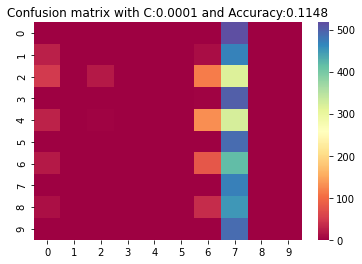

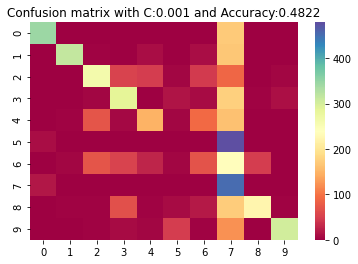

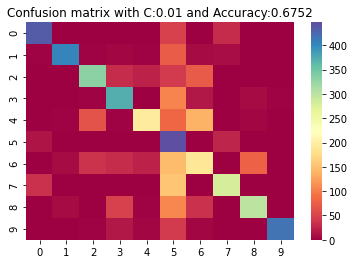

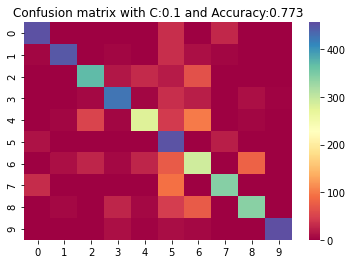

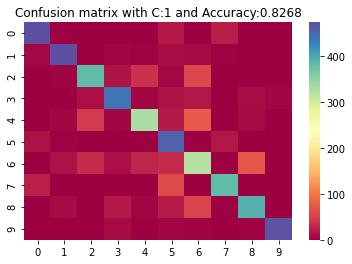

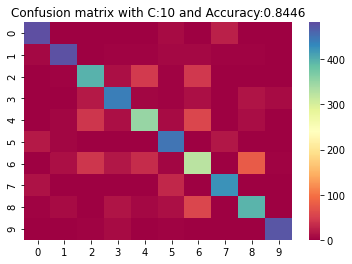

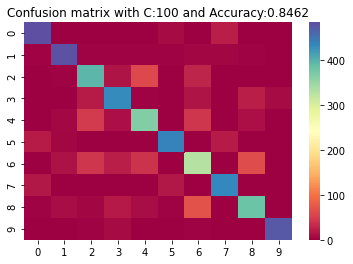

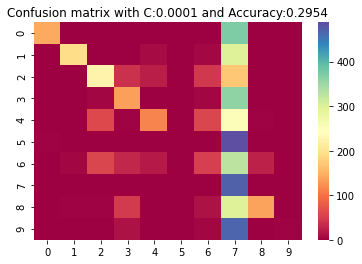

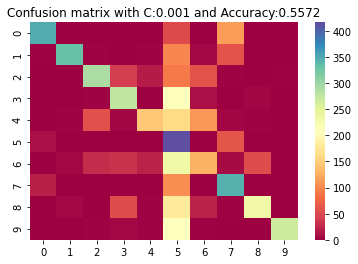

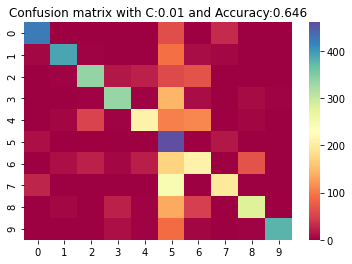

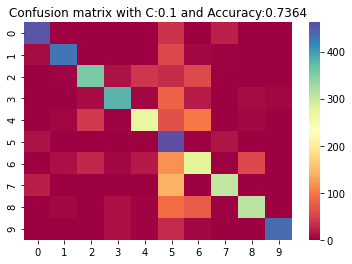

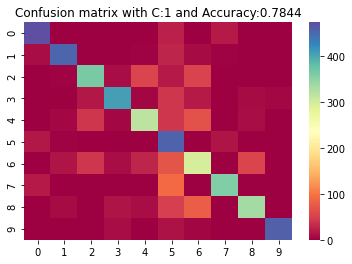

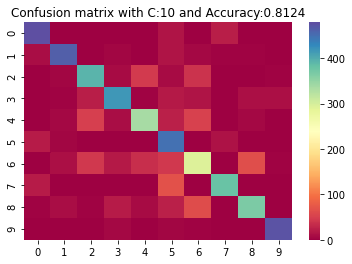

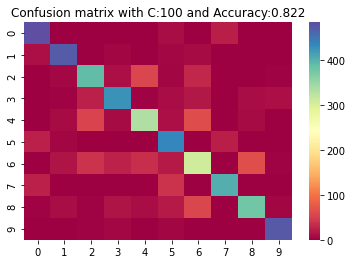

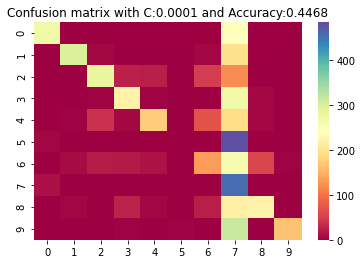

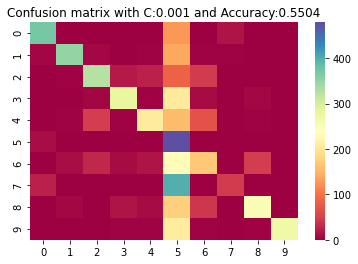

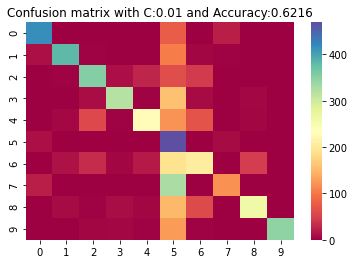

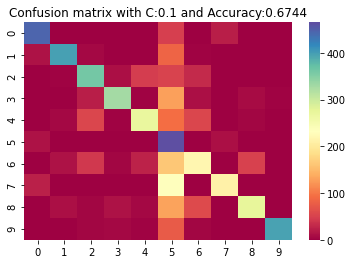

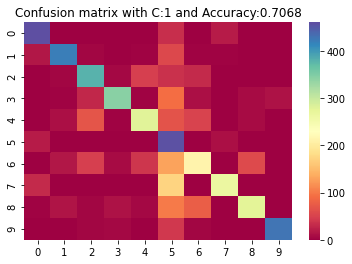

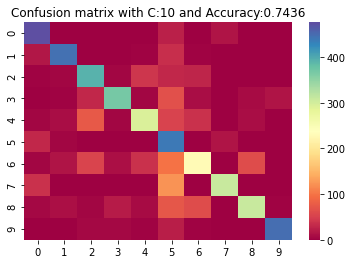

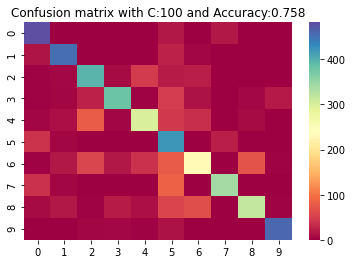

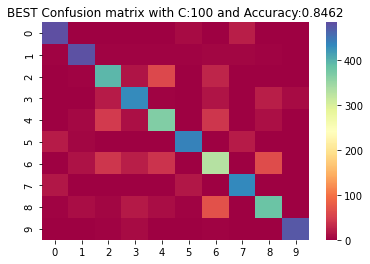

SVM Poly with C from [0.01 to 100] performed better than KNN, Naives bayes, CART and Random Forest


In [9]:
#SVM Polynomial 3,5,10
best_accuracy = 0
for d in [3,5,10]:
    for c in [0.0001,0.001,0.01,0.1,1,10,100]:
        svm = SVC(kernel='poly',degree=d, C=c, probability=True)
        svm.fit(X_train, Y_train)
        Y_pred = svm.predict(X_test)
        Y_pred_prob = svm.predict_proba(X_test)

        Conf = confusion_matrix(Y_test, Y_pred)
        accuracy = accuracy_score(Y_test, Y_pred)
        sb.heatmap(Conf, cmap='Spectral')
        plt.title(f"Confusion matrix with degree d:{d} & C:{c} and Accuracy:{accuracy}")
        plt.show()

        if (accuracy > best_accuracy):
            best_accuracy = accuracy 
            best_c = c
            best_conf = Conf
            best_d = d

sb.heatmap(best_conf, cmap='Spectral')
plt.title(f"BEST Confusion matrix with Degree D : {best_d}, C:{best_c} and Accuracy:{best_accuracy}")
plt.show()




Do you wish to see performance on the next test image? y/ny


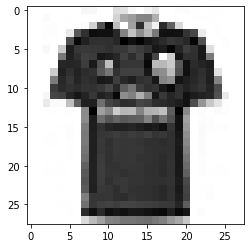

Actual value:  T-shirt/top   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.01 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.34 
p(7):  0.00 
p(8):  0.65 
p(9):  0.00 


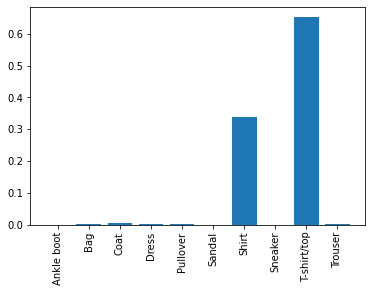

Do you wish to see performance on the next test image? y/ny


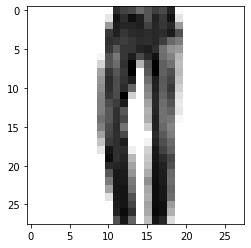

Actual value:  Trouser   predicted value:  Trouser
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.99 


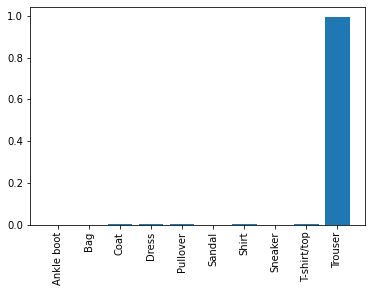

Do you wish to see performance on the next test image? y/ny


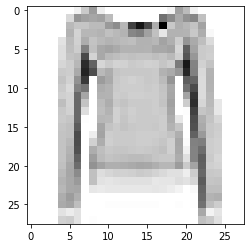

Actual value:  Pullover   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.01 
p(1):  0.01 
p(2):  0.03 
p(3):  0.08 
p(4):  0.11 
p(5):  0.01 
p(6):  0.65 
p(7):  0.00 
p(8):  0.09 
p(9):  0.02 


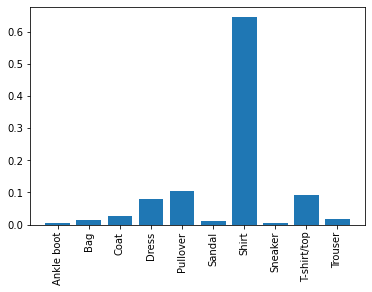

Do you wish to see performance on the next test image? y/ny


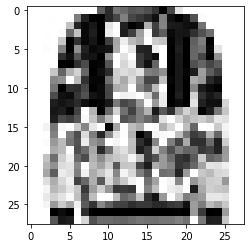

Actual value:  Pullover   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.01 
p(3):  0.01 
p(4):  0.03 
p(5):  0.00 
p(6):  0.85 
p(7):  0.00 
p(8):  0.09 
p(9):  0.00 


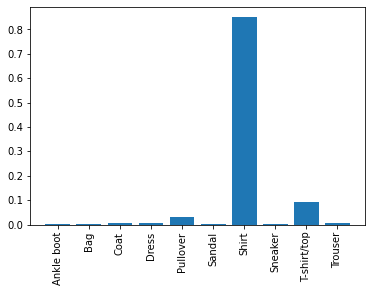

Do you wish to see performance on the next test image? y/ny


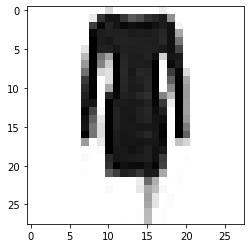

Actual value:  Dress   predicted value:  Dress
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.37 
p(3):  0.37 
p(4):  0.03 
p(5):  0.00 
p(6):  0.14 
p(7):  0.00 
p(8):  0.02 
p(9):  0.05 


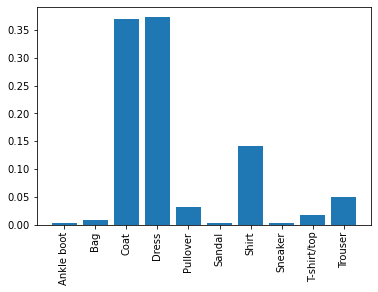

Do you wish to see performance on the next test image? y/ny


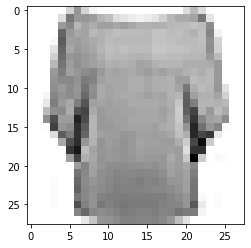

Actual value:  Pullover   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.05 
p(2):  0.01 
p(3):  0.03 
p(4):  0.07 
p(5):  0.00 
p(6):  0.19 
p(7):  0.00 
p(8):  0.65 
p(9):  0.00 


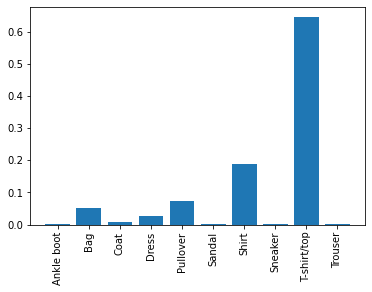

Do you wish to see performance on the next test image? y/ny


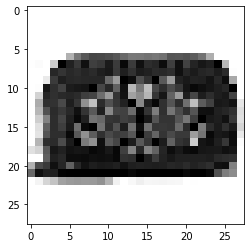

Actual value:  Bag   predicted value:  Bag
Predicted probability distribution:

p(0):  0.00 
p(1):  0.93 
p(2):  0.01 
p(3):  0.00 
p(4):  0.03 
p(5):  0.00 
p(6):  0.01 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


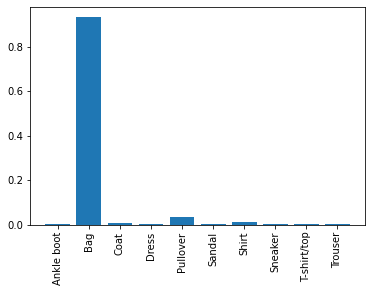

Do you wish to see performance on the next test image? y/ny


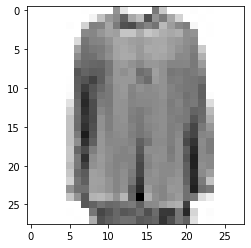

Actual value:  Shirt   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.00 
p(1):  0.03 
p(2):  0.08 
p(3):  0.11 
p(4):  0.20 
p(5):  0.00 
p(6):  0.42 
p(7):  0.00 
p(8):  0.15 
p(9):  0.00 


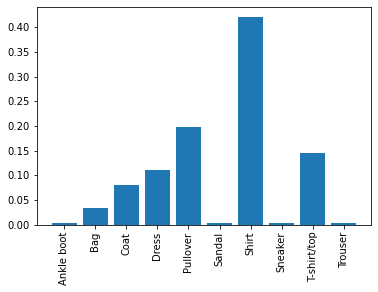

Do you wish to see performance on the next test image? y/ny


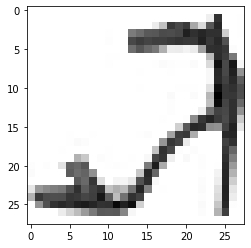

Actual value:  Sandal   predicted value:  Sandal
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  1.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


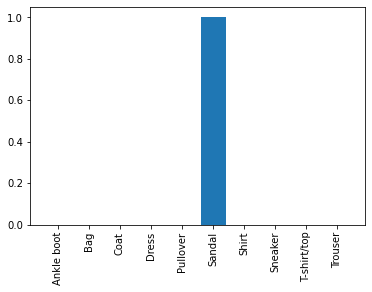

Do you wish to see performance on the next test image? y/ny


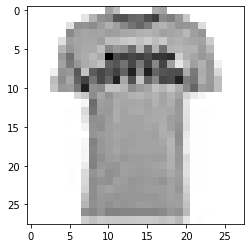

Actual value:  T-shirt/top   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.02 
p(4):  0.01 
p(5):  0.00 
p(6):  0.16 
p(7):  0.00 
p(8):  0.80 
p(9):  0.01 


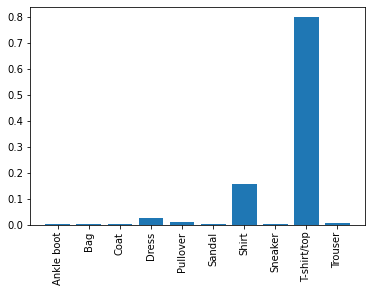

Do you wish to see performance on the next test image? y/ny


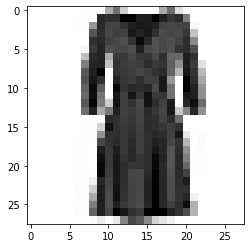

Actual value:  Dress   predicted value:  Dress
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.93 
p(4):  0.01 
p(5):  0.00 
p(6):  0.04 
p(7):  0.00 
p(8):  0.01 
p(9):  0.01 


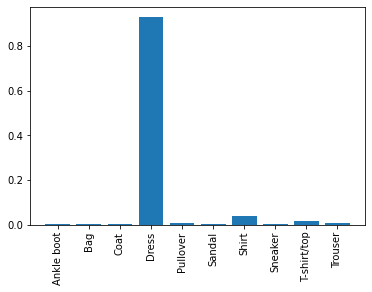

Do you wish to see performance on the next test image? y/ny


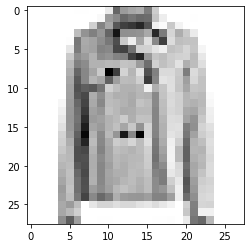

Actual value:  Coat   predicted value:  Pullover
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.14 
p(3):  0.02 
p(4):  0.54 
p(5):  0.00 
p(6):  0.21 
p(7):  0.00 
p(8):  0.06 
p(9):  0.01 


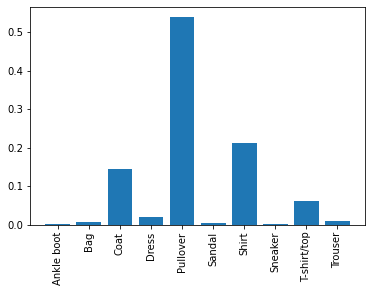

Do you wish to see performance on the next test image? y/ny


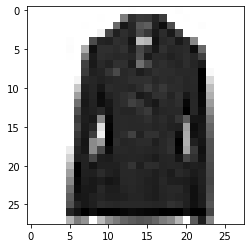

Actual value:  Coat   predicted value:  Coat
Predicted probability distribution:

p(0):  0.01 
p(1):  0.05 
p(2):  0.28 
p(3):  0.03 
p(4):  0.19 
p(5):  0.01 
p(6):  0.33 
p(7):  0.01 
p(8):  0.07 
p(9):  0.02 


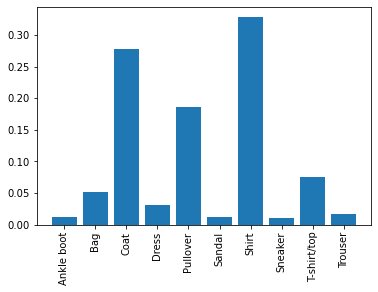

Do you wish to see performance on the next test image? y/ny


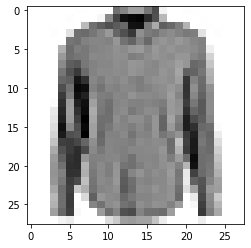

Actual value:  Shirt   predicted value:  Coat
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.49 
p(3):  0.02 
p(4):  0.21 
p(5):  0.00 
p(6):  0.23 
p(7):  0.00 
p(8):  0.02 
p(9):  0.01 


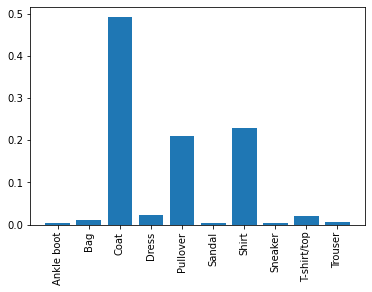

Do you wish to see performance on the next test image? y/ny


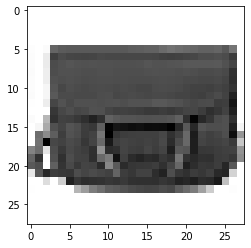

Actual value:  Bag   predicted value:  Bag
Predicted probability distribution:

p(0):  0.00 
p(1):  0.98 
p(2):  0.00 
p(3):  0.00 
p(4):  0.01 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


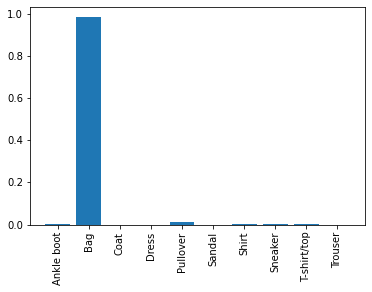

Do you wish to see performance on the next test image? y/nn


In [44]:
#For each image showing image, pred and true
for i in range(len(Y_test)):    
    if input("Do you wish to see performance on the next test image? y/n")=='n':       
        break    
    plt.imshow(np.array(X_test.iloc[i]).reshape((28,28)),cmap=plt.cm.binary)    
    plt.show()    
    print("Actual value: ",Y_test[i], "  predicted value: ", Y_pred[i])    
    print("Predicted probability distribution:\n")    
    [print("p(%d): %5.2f "% (j, Y_pred_prob[i,j])) for j in range(Y_pred_prob.shape[1])]    
    plt.bar(height=Y_pred_prob[i],x=name)
    plt.xticks(rotation = 90)
    plt.show()


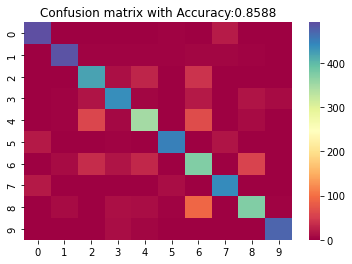

Neural Net with 3 layers(128,128,64) performed better than KNN, Naives bayes, CART, Random Forest, logistic regression and SVM


In [7]:
#Neural Network 3 layers

nn = MLPClassifier(hidden_layer_sizes=(128,128,64))
nn.fit(X_train, Y_train)
Y_pred = nn.predict(X_test)
Y_pred_prob = nn.predict_proba(X_test)
    
Conf = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)
sb.heatmap(Conf, cmap='Spectral')
plt.title(f"Confusion matrix with Accuracy:{accuracy}")
plt.show()



Do you wish to see performance on the next test image? y/ny


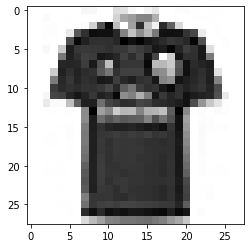

Actual value:  T-shirt/top   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.01 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.34 
p(7):  0.00 
p(8):  0.65 
p(9):  0.00 


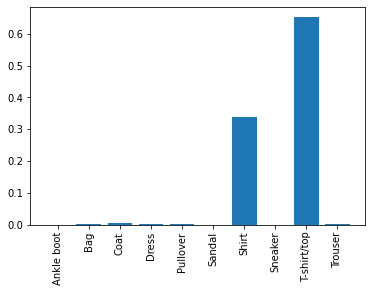

Do you wish to see performance on the next test image? y/ny


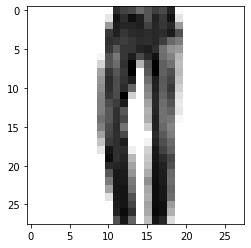

Actual value:  Trouser   predicted value:  Trouser
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.99 


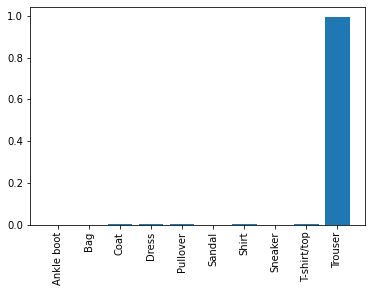

Do you wish to see performance on the next test image? y/ny


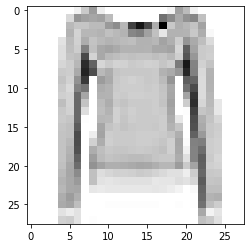

Actual value:  Pullover   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.01 
p(1):  0.01 
p(2):  0.03 
p(3):  0.08 
p(4):  0.11 
p(5):  0.01 
p(6):  0.65 
p(7):  0.00 
p(8):  0.09 
p(9):  0.02 


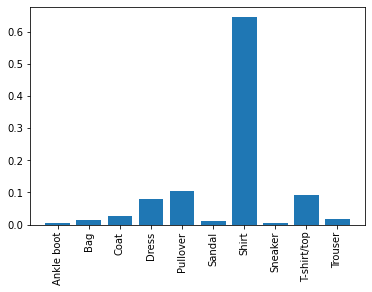

Do you wish to see performance on the next test image? y/ny


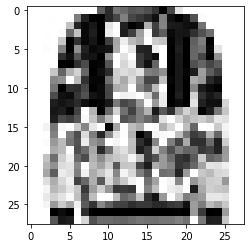

Actual value:  Pullover   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.01 
p(3):  0.01 
p(4):  0.03 
p(5):  0.00 
p(6):  0.85 
p(7):  0.00 
p(8):  0.09 
p(9):  0.00 


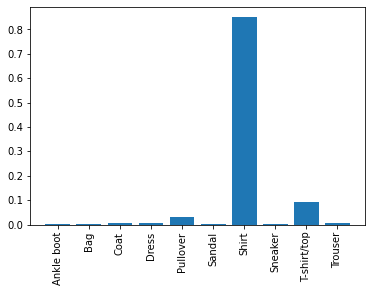

Do you wish to see performance on the next test image? y/ny


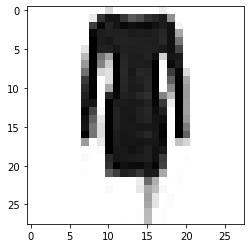

Actual value:  Dress   predicted value:  Dress
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.37 
p(3):  0.37 
p(4):  0.03 
p(5):  0.00 
p(6):  0.14 
p(7):  0.00 
p(8):  0.02 
p(9):  0.05 


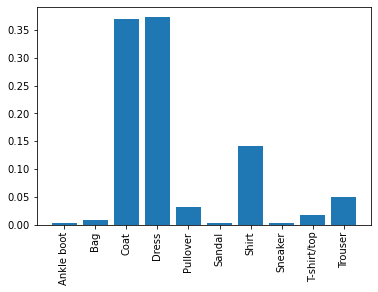

Do you wish to see performance on the next test image? y/ny


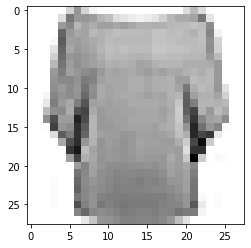

Actual value:  Pullover   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.05 
p(2):  0.01 
p(3):  0.03 
p(4):  0.07 
p(5):  0.00 
p(6):  0.19 
p(7):  0.00 
p(8):  0.65 
p(9):  0.00 


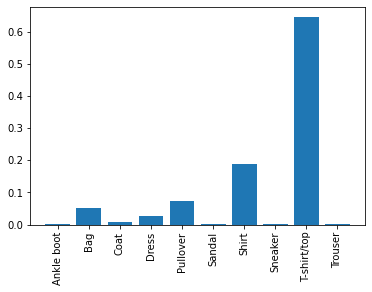

Do you wish to see performance on the next test image? y/ny


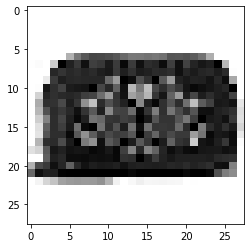

Actual value:  Bag   predicted value:  Bag
Predicted probability distribution:

p(0):  0.00 
p(1):  0.93 
p(2):  0.01 
p(3):  0.00 
p(4):  0.03 
p(5):  0.00 
p(6):  0.01 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


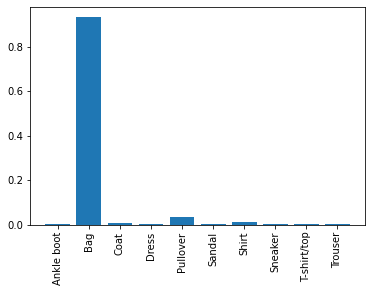

Do you wish to see performance on the next test image? y/ny


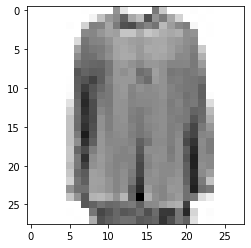

Actual value:  Shirt   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.00 
p(1):  0.03 
p(2):  0.08 
p(3):  0.11 
p(4):  0.20 
p(5):  0.00 
p(6):  0.42 
p(7):  0.00 
p(8):  0.15 
p(9):  0.00 


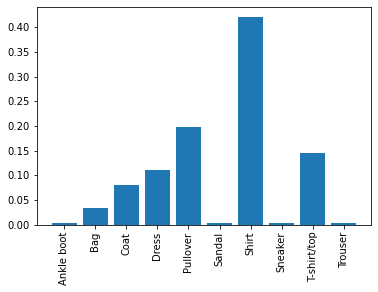

Do you wish to see performance on the next test image? y/ny


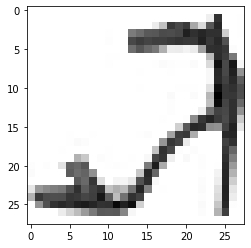

Actual value:  Sandal   predicted value:  Sandal
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  1.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


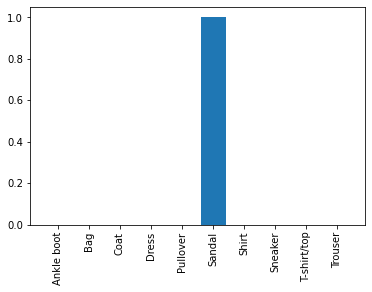

Do you wish to see performance on the next test image? y/ny


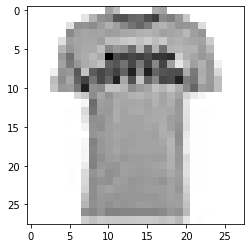

Actual value:  T-shirt/top   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.02 
p(4):  0.01 
p(5):  0.00 
p(6):  0.16 
p(7):  0.00 
p(8):  0.80 
p(9):  0.01 


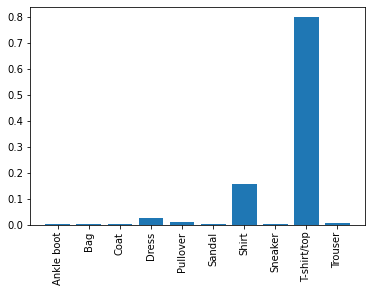

Do you wish to see performance on the next test image? y/ny


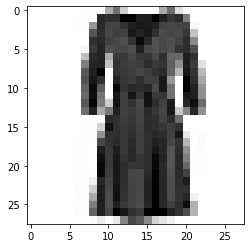

Actual value:  Dress   predicted value:  Dress
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.93 
p(4):  0.01 
p(5):  0.00 
p(6):  0.04 
p(7):  0.00 
p(8):  0.01 
p(9):  0.01 


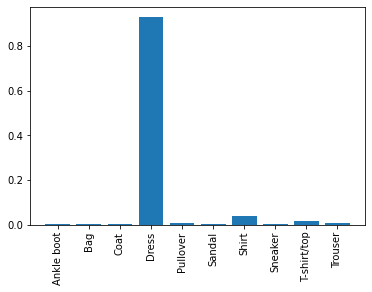

Do you wish to see performance on the next test image? y/ny


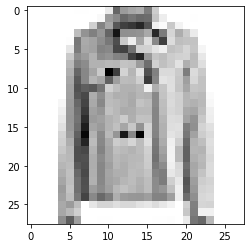

Actual value:  Coat   predicted value:  Pullover
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.14 
p(3):  0.02 
p(4):  0.54 
p(5):  0.00 
p(6):  0.21 
p(7):  0.00 
p(8):  0.06 
p(9):  0.01 


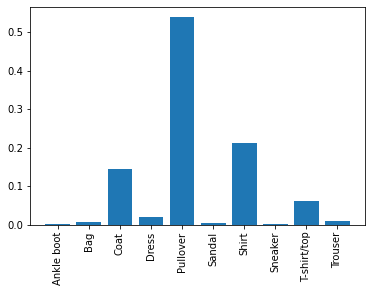

Do you wish to see performance on the next test image? y/ny


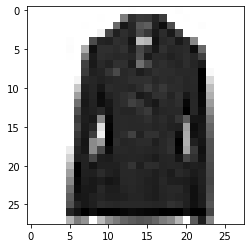

Actual value:  Coat   predicted value:  Coat
Predicted probability distribution:

p(0):  0.01 
p(1):  0.05 
p(2):  0.28 
p(3):  0.03 
p(4):  0.19 
p(5):  0.01 
p(6):  0.33 
p(7):  0.01 
p(8):  0.07 
p(9):  0.02 


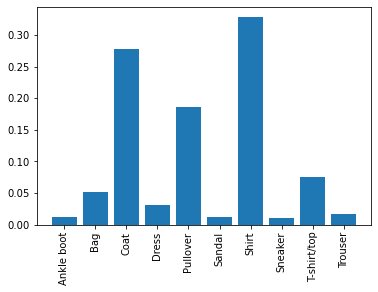

Do you wish to see performance on the next test image? y/ny


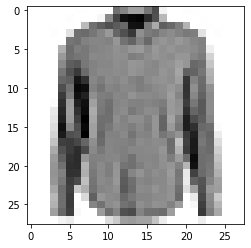

Actual value:  Shirt   predicted value:  Coat
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.49 
p(3):  0.02 
p(4):  0.21 
p(5):  0.00 
p(6):  0.23 
p(7):  0.00 
p(8):  0.02 
p(9):  0.01 


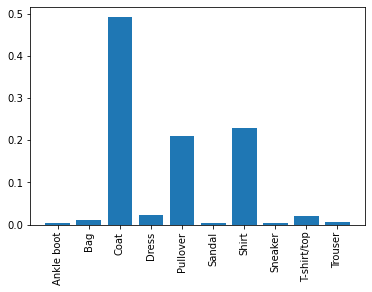

Do you wish to see performance on the next test image? y/ny


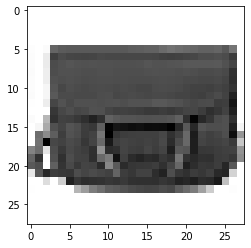

Actual value:  Bag   predicted value:  Bag
Predicted probability distribution:

p(0):  0.00 
p(1):  0.98 
p(2):  0.00 
p(3):  0.00 
p(4):  0.01 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


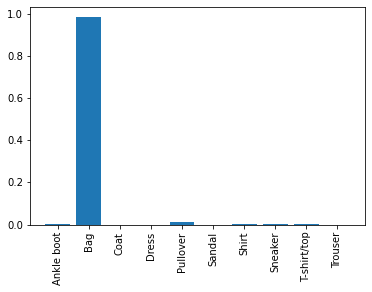

Do you wish to see performance on the next test image? y/ny


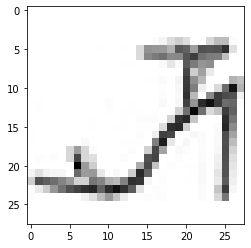

Actual value:  Sandal   predicted value:  Sandal
Predicted probability distribution:

p(0):  0.01 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.96 
p(6):  0.00 
p(7):  0.02 
p(8):  0.00 
p(9):  0.00 


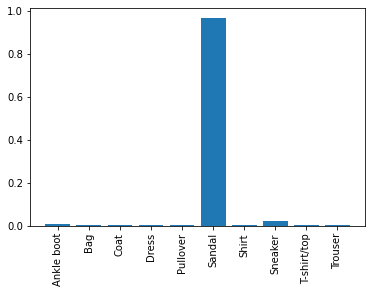

Do you wish to see performance on the next test image? y/ny


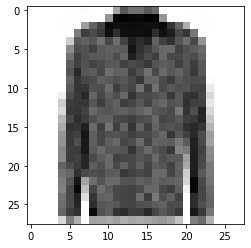

Actual value:  Shirt   predicted value:  Coat
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.69 
p(3):  0.01 
p(4):  0.08 
p(5):  0.00 
p(6):  0.22 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


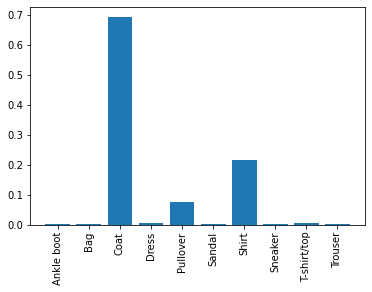

Do you wish to see performance on the next test image? y/ny


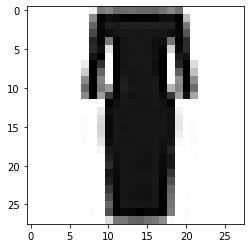

Actual value:  Dress   predicted value:  Dress
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.93 
p(4):  0.00 
p(5):  0.00 
p(6):  0.03 
p(7):  0.00 
p(8):  0.01 
p(9):  0.03 


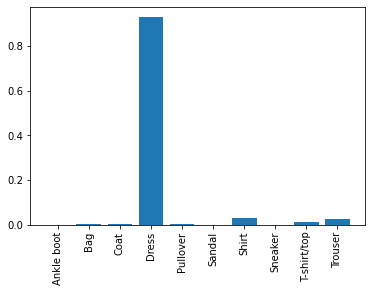

Do you wish to see performance on the next test image? y/ny


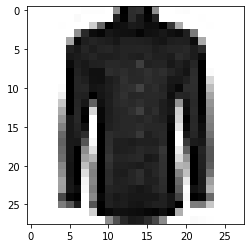

Actual value:  Shirt   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.01 
p(1):  0.03 
p(2):  0.15 
p(3):  0.03 
p(4):  0.11 
p(5):  0.01 
p(6):  0.58 
p(7):  0.01 
p(8):  0.07 
p(9):  0.01 


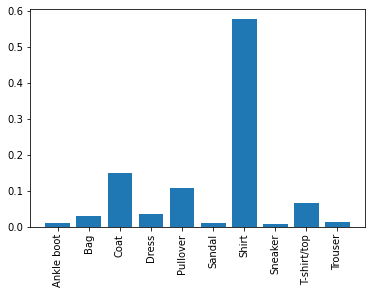

Do you wish to see performance on the next test image? y/ny


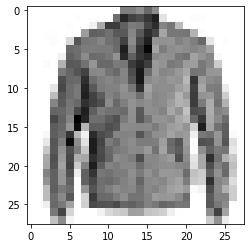

Actual value:  Coat   predicted value:  Coat
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.91 
p(3):  0.00 
p(4):  0.05 
p(5):  0.00 
p(6):  0.02 
p(7):  0.00 
p(8):  0.01 
p(9):  0.00 


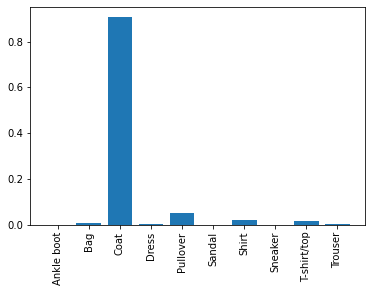

Do you wish to see performance on the next test image? y/ny


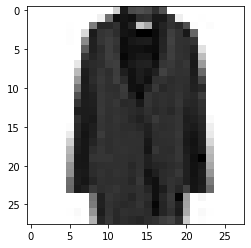

Actual value:  Coat   predicted value:  Coat
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.69 
p(3):  0.10 
p(4):  0.06 
p(5):  0.00 
p(6):  0.10 
p(7):  0.00 
p(8):  0.02 
p(9):  0.01 


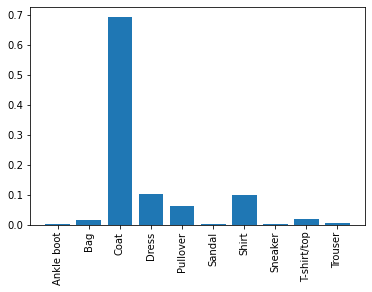

Do you wish to see performance on the next test image? y/ny


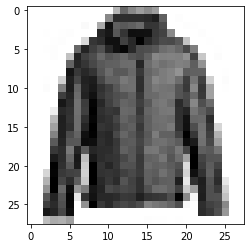

Actual value:  Coat   predicted value:  Pullover
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.30 
p(3):  0.00 
p(4):  0.69 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


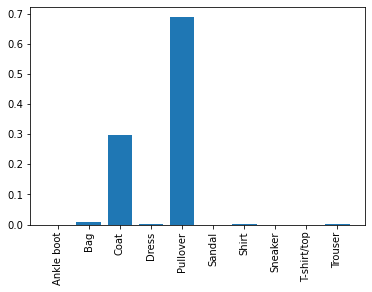

Do you wish to see performance on the next test image? y/ny


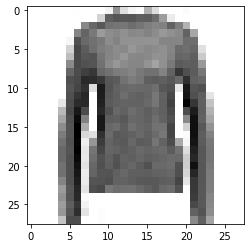

Actual value:  Pullover   predicted value:  Pullover
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.86 
p(5):  0.00 
p(6):  0.11 
p(7):  0.00 
p(8):  0.01 
p(9):  0.00 


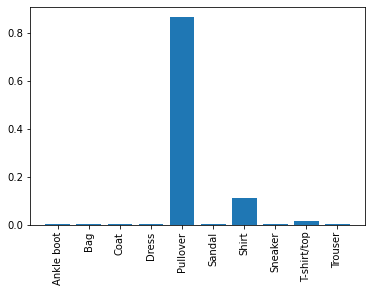

Do you wish to see performance on the next test image? y/ny


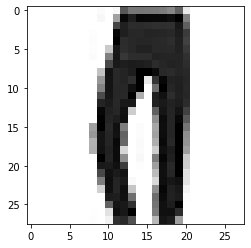

Actual value:  Trouser   predicted value:  Trouser
Predicted probability distribution:

p(0):  0.01 
p(1):  0.02 
p(2):  0.04 
p(3):  0.21 
p(4):  0.03 
p(5):  0.01 
p(6):  0.07 
p(7):  0.01 
p(8):  0.07 
p(9):  0.52 


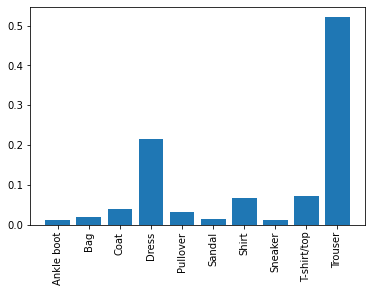

Do you wish to see performance on the next test image? y/ny


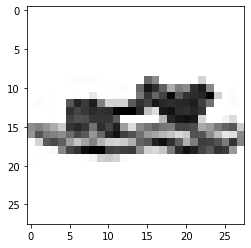

Actual value:  Sandal   predicted value:  Sandal
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.99 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


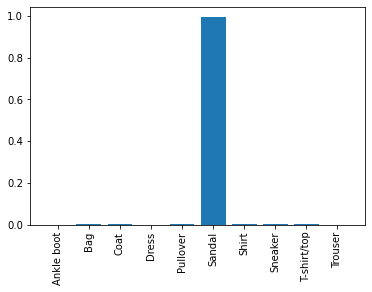

Do you wish to see performance on the next test image? y/ny


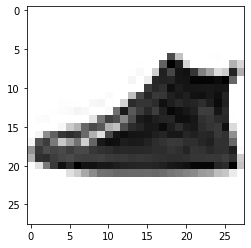

Actual value:  Sneaker   predicted value:  Sneaker
Predicted probability distribution:

p(0):  0.20 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.01 
p(6):  0.00 
p(7):  0.78 
p(8):  0.00 
p(9):  0.00 


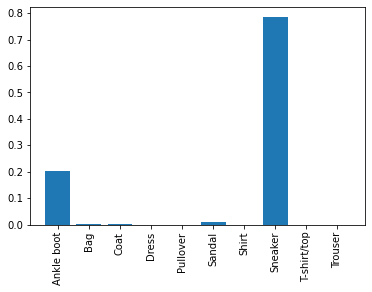

Do you wish to see performance on the next test image? y/ny


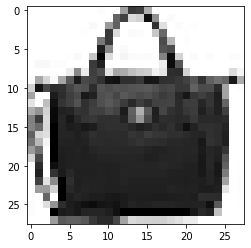

Actual value:  Bag   predicted value:  Bag
Predicted probability distribution:

p(0):  0.00 
p(1):  1.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


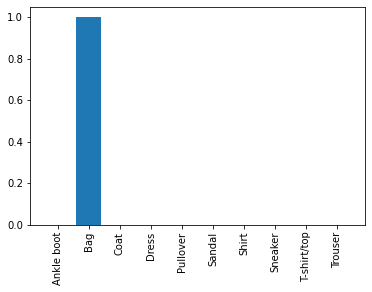

Do you wish to see performance on the next test image? y/ny


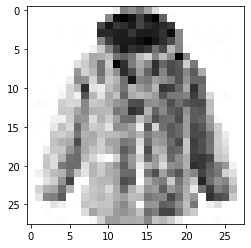

Actual value:  Coat   predicted value:  Coat
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.89 
p(3):  0.01 
p(4):  0.04 
p(5):  0.00 
p(6):  0.01 
p(7):  0.00 
p(8):  0.00 
p(9):  0.02 


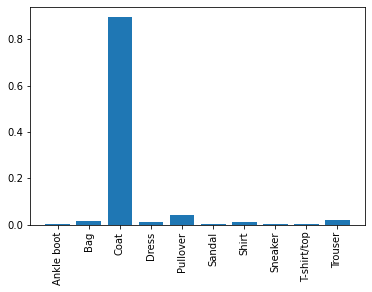

Do you wish to see performance on the next test image? y/ny


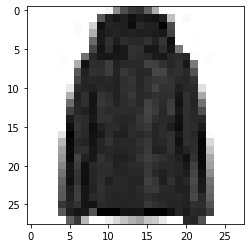

Actual value:  Coat   predicted value:  Coat
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.84 
p(3):  0.00 
p(4):  0.08 
p(5):  0.00 
p(6):  0.06 
p(7):  0.00 
p(8):  0.01 
p(9):  0.00 


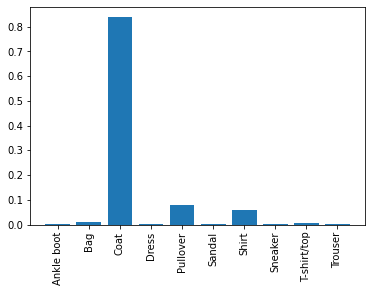

Do you wish to see performance on the next test image? y/ny


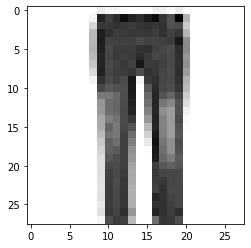

Actual value:  Trouser   predicted value:  Trouser
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.01 
p(4):  0.00 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.01 
p(9):  0.98 


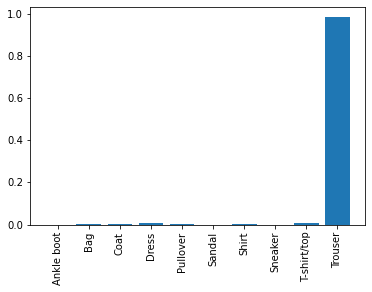

Do you wish to see performance on the next test image? y/ny


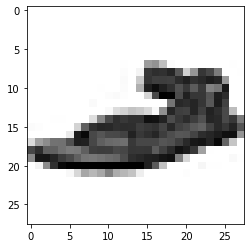

Actual value:  Sandal   predicted value:  Sneaker
Predicted probability distribution:

p(0):  0.04 
p(1):  0.02 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.03 
p(6):  0.00 
p(7):  0.91 
p(8):  0.00 
p(9):  0.00 


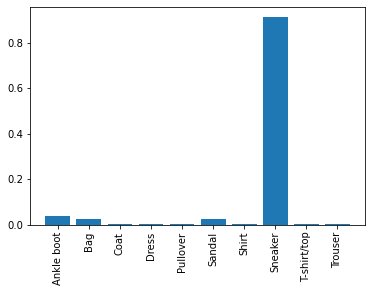

Do you wish to see performance on the next test image? y/ny


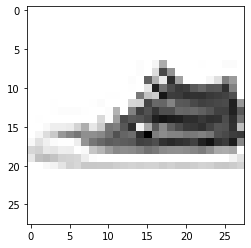

Actual value:  Sneaker   predicted value:  Sneaker
Predicted probability distribution:

p(0):  0.01 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.02 
p(6):  0.00 
p(7):  0.97 
p(8):  0.00 
p(9):  0.00 


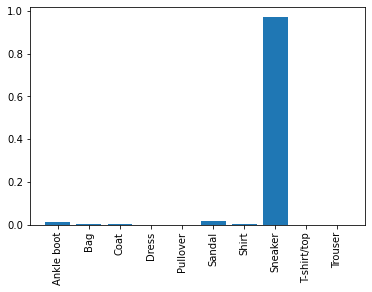

Do you wish to see performance on the next test image? y/ny


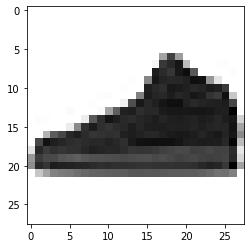

Actual value:  Sneaker   predicted value:  Sneaker
Predicted probability distribution:

p(0):  0.14 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.01 
p(6):  0.00 
p(7):  0.85 
p(8):  0.00 
p(9):  0.00 


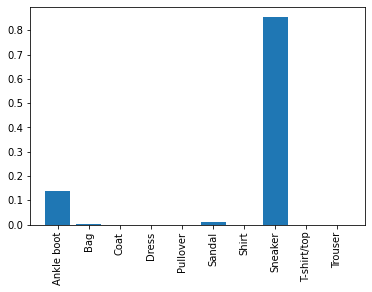

Do you wish to see performance on the next test image? y/nn


In [45]:
#For each image showing image, pred and true
for i in range(len(Y_test)):    
    if input("Do you wish to see performance on the next test image? y/n")=='n':       
        break    
    plt.imshow(np.array(X_test.iloc[i]).reshape((28,28)),cmap=plt.cm.binary)    
    plt.show()    
    print("Actual value: ",Y_test[i], "  predicted value: ", Y_pred[i])    
    print("Predicted probability distribution:\n")    
    [print("p(%d): %5.2f "% (j, Y_pred_prob[i,j])) for j in range(Y_pred_prob.shape[1])]    
    plt.bar(height=Y_pred_prob[i],x=name)
    plt.xticks(rotation = 90)
    plt.show()


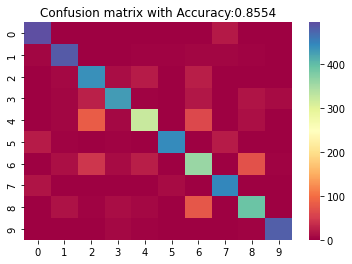

Neural Net with 4 layers(128,128,64,32) performed better than KNN, Naives bayes, CART and Random Forest
Neural Net with 3 layers performed better than 4 layers


In [10]:
#Neural Network 4 layers

nn = MLPClassifier(hidden_layer_sizes=(128,128,64,32))
nn.fit(X_train, Y_train)
Y_pred = nn.predict(X_test)
Y_pred_prob = nn.predict_proba(X_test)
    
Conf = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)
sb.heatmap(Conf, cmap='Spectral')
plt.title(f"Confusion matrix with Accuracy:{accuracy}")
plt.show()
print("Neural Net with 3 layers performed better than 4 layers")

Do you wish to see performance on the next test image? y/ny


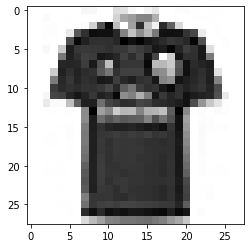

Actual value:  T-shirt/top   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.01 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.34 
p(7):  0.00 
p(8):  0.65 
p(9):  0.00 


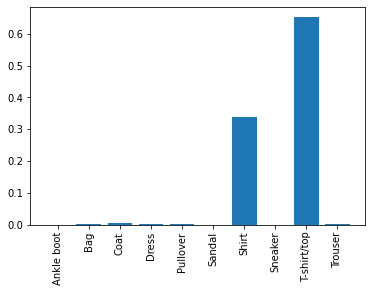

Do you wish to see performance on the next test image? y/ny


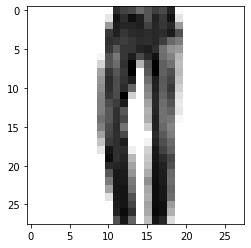

Actual value:  Trouser   predicted value:  Trouser
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.99 


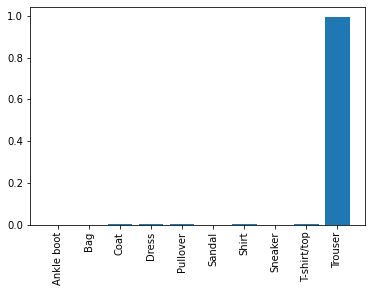

Do you wish to see performance on the next test image? y/ny


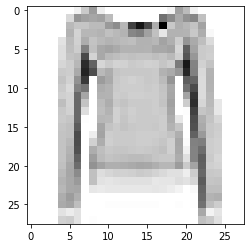

Actual value:  Pullover   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.01 
p(1):  0.01 
p(2):  0.03 
p(3):  0.08 
p(4):  0.11 
p(5):  0.01 
p(6):  0.65 
p(7):  0.00 
p(8):  0.09 
p(9):  0.02 


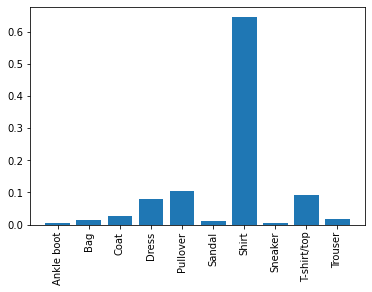

Do you wish to see performance on the next test image? y/n


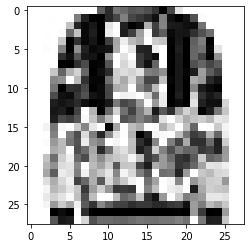

Actual value:  Pullover   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.01 
p(3):  0.01 
p(4):  0.03 
p(5):  0.00 
p(6):  0.85 
p(7):  0.00 
p(8):  0.09 
p(9):  0.00 


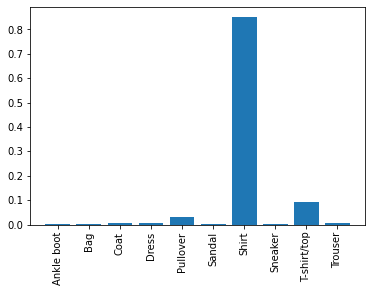

Do you wish to see performance on the next test image? y/ny


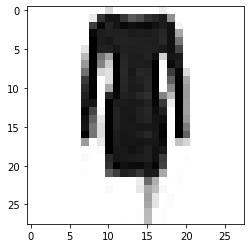

Actual value:  Dress   predicted value:  Dress
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.37 
p(3):  0.37 
p(4):  0.03 
p(5):  0.00 
p(6):  0.14 
p(7):  0.00 
p(8):  0.02 
p(9):  0.05 


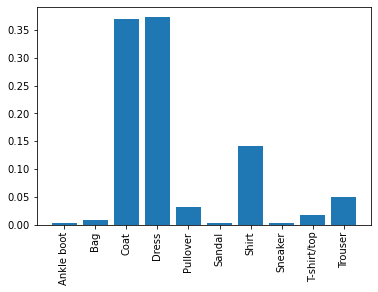

Do you wish to see performance on the next test image? y/ny


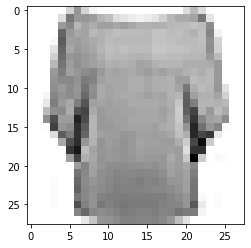

Actual value:  Pullover   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.05 
p(2):  0.01 
p(3):  0.03 
p(4):  0.07 
p(5):  0.00 
p(6):  0.19 
p(7):  0.00 
p(8):  0.65 
p(9):  0.00 


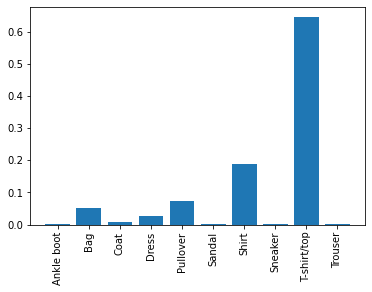

Do you wish to see performance on the next test image? y/ny


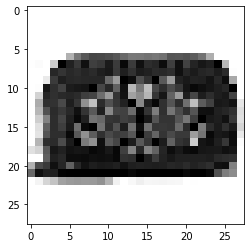

Actual value:  Bag   predicted value:  Bag
Predicted probability distribution:

p(0):  0.00 
p(1):  0.93 
p(2):  0.01 
p(3):  0.00 
p(4):  0.03 
p(5):  0.00 
p(6):  0.01 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


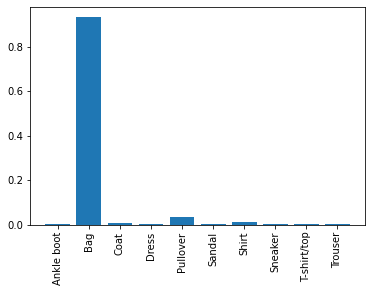

Do you wish to see performance on the next test image? y/ny


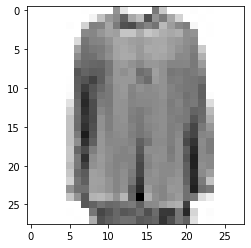

Actual value:  Shirt   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.00 
p(1):  0.03 
p(2):  0.08 
p(3):  0.11 
p(4):  0.20 
p(5):  0.00 
p(6):  0.42 
p(7):  0.00 
p(8):  0.15 
p(9):  0.00 


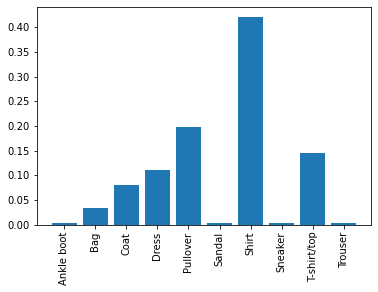

Do you wish to see performance on the next test image? y/ny


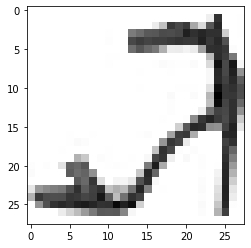

Actual value:  Sandal   predicted value:  Sandal
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  1.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


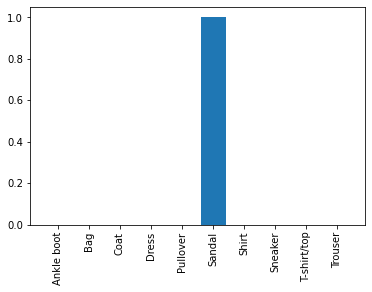

Do you wish to see performance on the next test image? y/ny


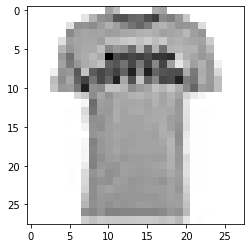

Actual value:  T-shirt/top   predicted value:  T-shirt/top
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.02 
p(4):  0.01 
p(5):  0.00 
p(6):  0.16 
p(7):  0.00 
p(8):  0.80 
p(9):  0.01 


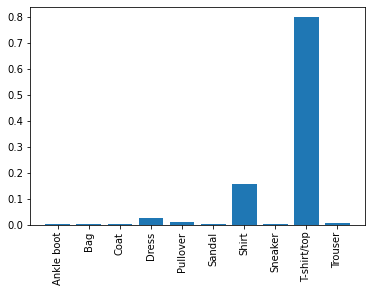

Do you wish to see performance on the next test image? y/ny


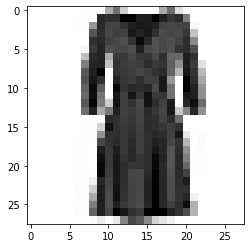

Actual value:  Dress   predicted value:  Dress
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.93 
p(4):  0.01 
p(5):  0.00 
p(6):  0.04 
p(7):  0.00 
p(8):  0.01 
p(9):  0.01 


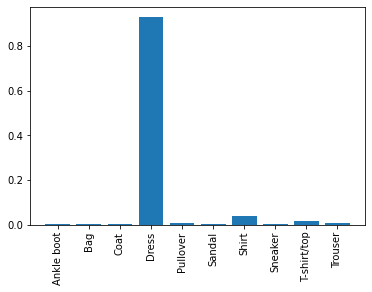

Do you wish to see performance on the next test image? y/ny


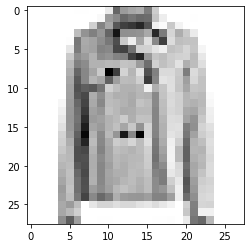

Actual value:  Coat   predicted value:  Pullover
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.14 
p(3):  0.02 
p(4):  0.54 
p(5):  0.00 
p(6):  0.21 
p(7):  0.00 
p(8):  0.06 
p(9):  0.01 


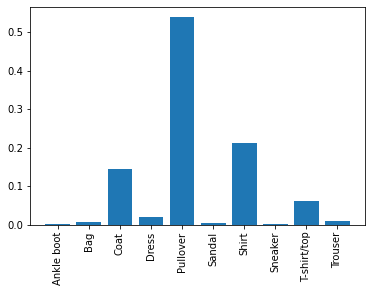

Do you wish to see performance on the next test image? y/ny


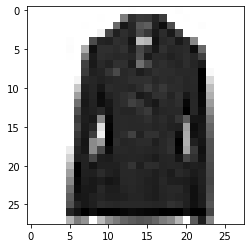

Actual value:  Coat   predicted value:  Coat
Predicted probability distribution:

p(0):  0.01 
p(1):  0.05 
p(2):  0.28 
p(3):  0.03 
p(4):  0.19 
p(5):  0.01 
p(6):  0.33 
p(7):  0.01 
p(8):  0.07 
p(9):  0.02 


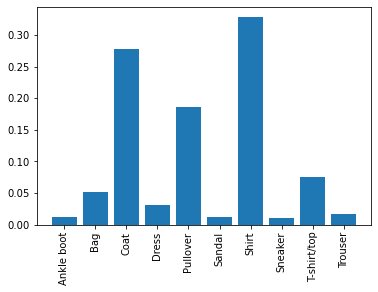

Do you wish to see performance on the next test image? y/ny


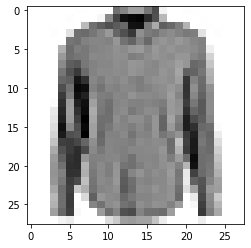

Actual value:  Shirt   predicted value:  Coat
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.49 
p(3):  0.02 
p(4):  0.21 
p(5):  0.00 
p(6):  0.23 
p(7):  0.00 
p(8):  0.02 
p(9):  0.01 


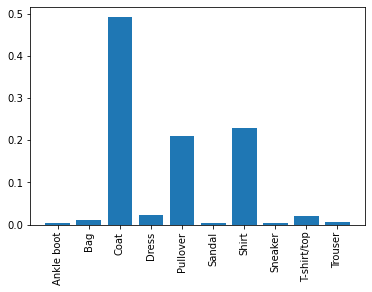

Do you wish to see performance on the next test image? y/ny


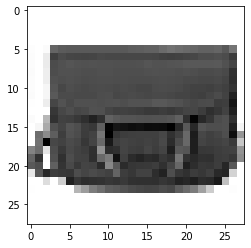

Actual value:  Bag   predicted value:  Bag
Predicted probability distribution:

p(0):  0.00 
p(1):  0.98 
p(2):  0.00 
p(3):  0.00 
p(4):  0.01 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


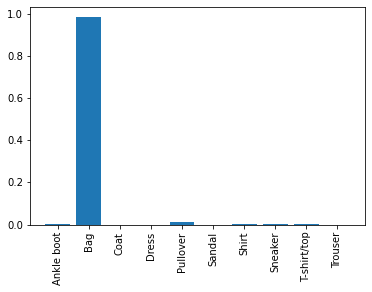

Do you wish to see performance on the next test image? y/ny


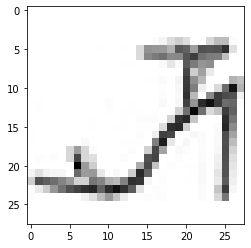

Actual value:  Sandal   predicted value:  Sandal
Predicted probability distribution:

p(0):  0.01 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.96 
p(6):  0.00 
p(7):  0.02 
p(8):  0.00 
p(9):  0.00 


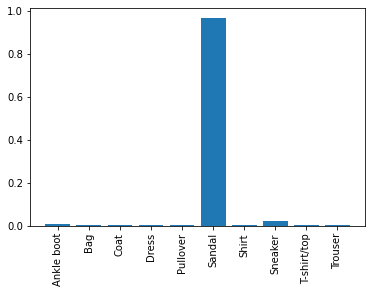

Do you wish to see performance on the next test image? y/ny


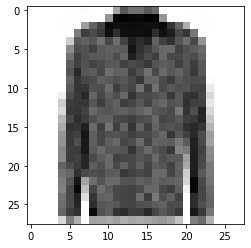

Actual value:  Shirt   predicted value:  Coat
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.69 
p(3):  0.01 
p(4):  0.08 
p(5):  0.00 
p(6):  0.22 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


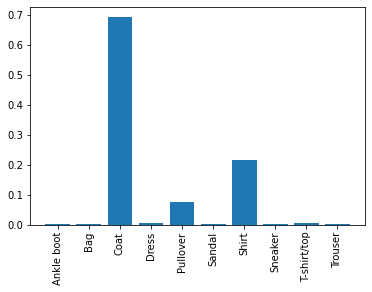

Do you wish to see performance on the next test image? y/ny


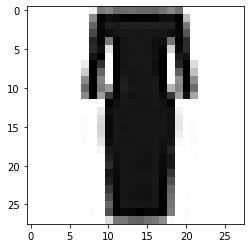

Actual value:  Dress   predicted value:  Dress
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.93 
p(4):  0.00 
p(5):  0.00 
p(6):  0.03 
p(7):  0.00 
p(8):  0.01 
p(9):  0.03 


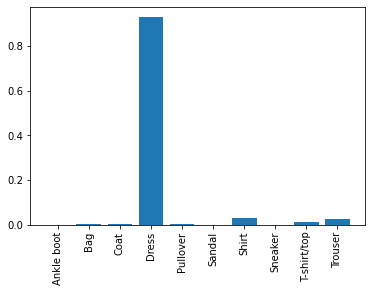

Do you wish to see performance on the next test image? y/ny


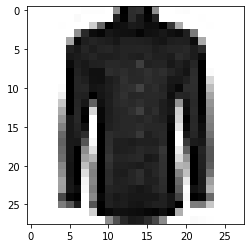

Actual value:  Shirt   predicted value:  Shirt
Predicted probability distribution:

p(0):  0.01 
p(1):  0.03 
p(2):  0.15 
p(3):  0.03 
p(4):  0.11 
p(5):  0.01 
p(6):  0.58 
p(7):  0.01 
p(8):  0.07 
p(9):  0.01 


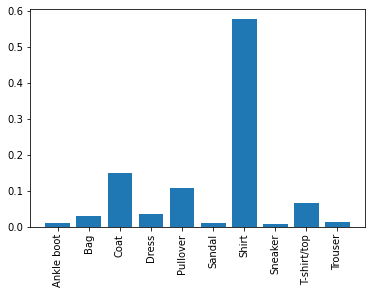

Do you wish to see performance on the next test image? y/ny


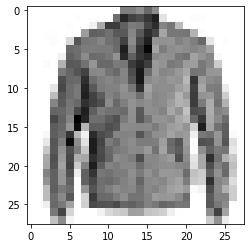

Actual value:  Coat   predicted value:  Coat
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.91 
p(3):  0.00 
p(4):  0.05 
p(5):  0.00 
p(6):  0.02 
p(7):  0.00 
p(8):  0.01 
p(9):  0.00 


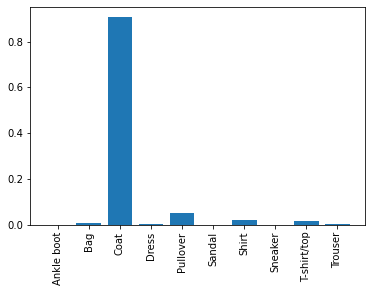

Do you wish to see performance on the next test image? y/ny


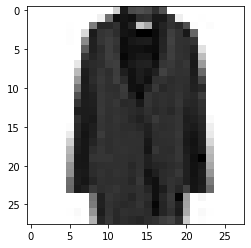

Actual value:  Coat   predicted value:  Coat
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.69 
p(3):  0.10 
p(4):  0.06 
p(5):  0.00 
p(6):  0.10 
p(7):  0.00 
p(8):  0.02 
p(9):  0.01 


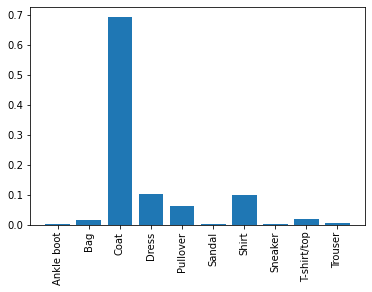

Do you wish to see performance on the next test image? y/ny


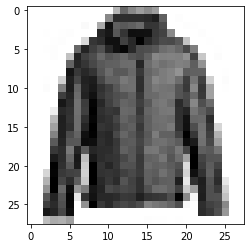

Actual value:  Coat   predicted value:  Pullover
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.30 
p(3):  0.00 
p(4):  0.69 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


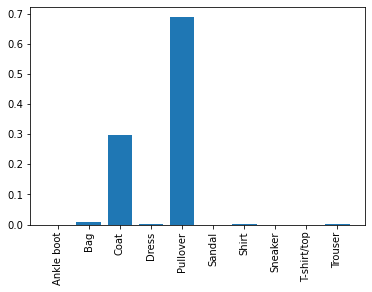

Do you wish to see performance on the next test image? y/ny


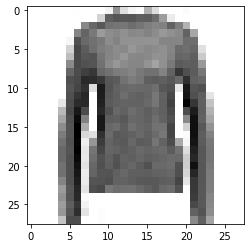

Actual value:  Pullover   predicted value:  Pullover
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.86 
p(5):  0.00 
p(6):  0.11 
p(7):  0.00 
p(8):  0.01 
p(9):  0.00 


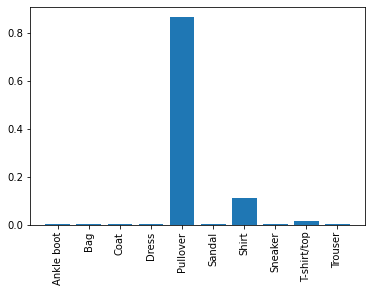

Do you wish to see performance on the next test image? y/ny


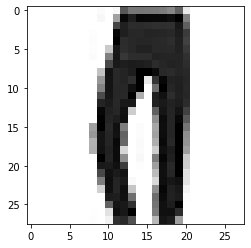

Actual value:  Trouser   predicted value:  Trouser
Predicted probability distribution:

p(0):  0.01 
p(1):  0.02 
p(2):  0.04 
p(3):  0.21 
p(4):  0.03 
p(5):  0.01 
p(6):  0.07 
p(7):  0.01 
p(8):  0.07 
p(9):  0.52 


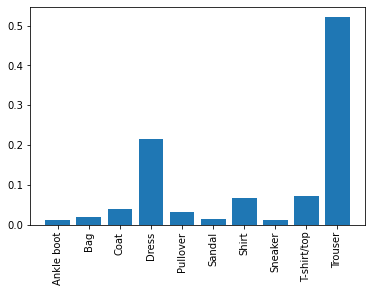

Do you wish to see performance on the next test image? y/ny


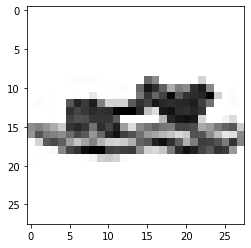

Actual value:  Sandal   predicted value:  Sandal
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.99 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


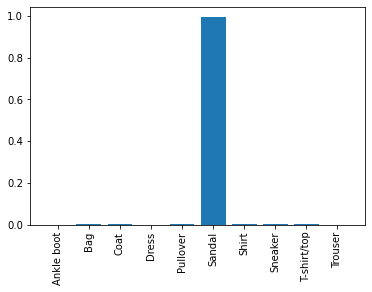

Do you wish to see performance on the next test image? y/ny


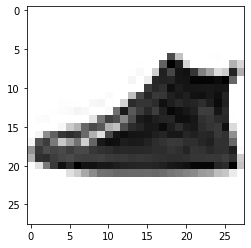

Actual value:  Sneaker   predicted value:  Sneaker
Predicted probability distribution:

p(0):  0.20 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.01 
p(6):  0.00 
p(7):  0.78 
p(8):  0.00 
p(9):  0.00 


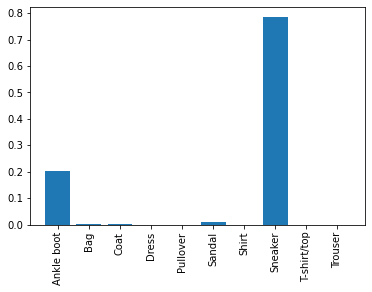

Do you wish to see performance on the next test image? y/ny


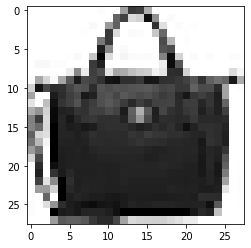

Actual value:  Bag   predicted value:  Bag
Predicted probability distribution:

p(0):  0.00 
p(1):  1.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


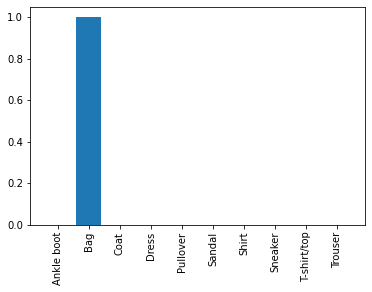

Do you wish to see performance on the next test image? y/ny


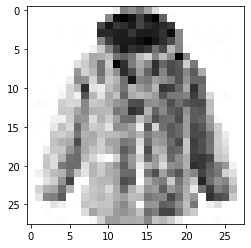

Actual value:  Coat   predicted value:  Coat
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.89 
p(3):  0.01 
p(4):  0.04 
p(5):  0.00 
p(6):  0.01 
p(7):  0.00 
p(8):  0.00 
p(9):  0.02 


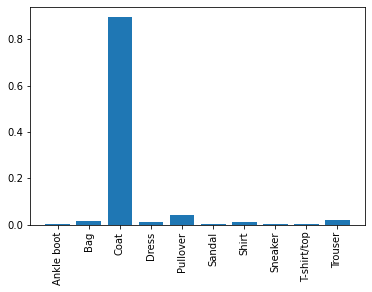

Do you wish to see performance on the next test image? y/ny


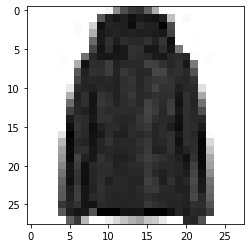

Actual value:  Coat   predicted value:  Coat
Predicted probability distribution:

p(0):  0.00 
p(1):  0.01 
p(2):  0.84 
p(3):  0.00 
p(4):  0.08 
p(5):  0.00 
p(6):  0.06 
p(7):  0.00 
p(8):  0.01 
p(9):  0.00 


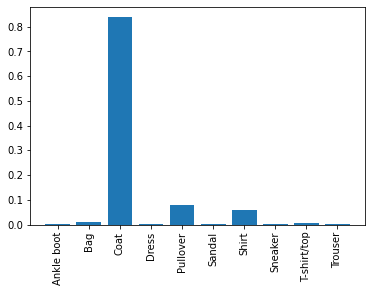

Do you wish to see performance on the next test image? y/ny


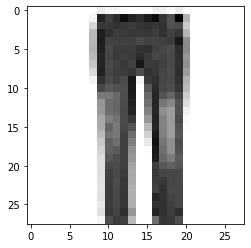

Actual value:  Trouser   predicted value:  Trouser
Predicted probability distribution:

p(0):  0.00 
p(1):  0.00 
p(2):  0.00 
p(3):  0.01 
p(4):  0.00 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.01 
p(9):  0.98 


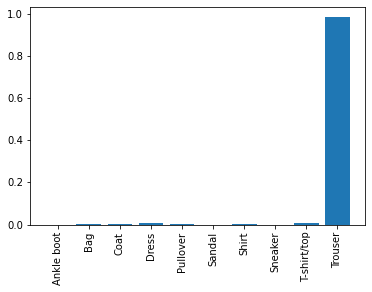

Do you wish to see performance on the next test image? y/ny


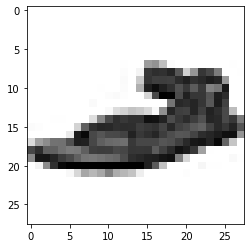

Actual value:  Sandal   predicted value:  Sneaker
Predicted probability distribution:

p(0):  0.04 
p(1):  0.02 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.03 
p(6):  0.00 
p(7):  0.91 
p(8):  0.00 
p(9):  0.00 


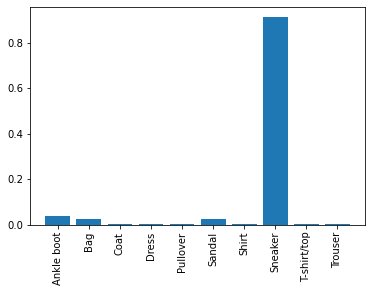

Do you wish to see performance on the next test image? y/ny


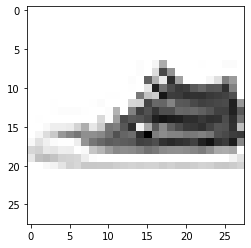

Actual value:  Sneaker   predicted value:  Sneaker
Predicted probability distribution:

p(0):  0.01 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.02 
p(6):  0.00 
p(7):  0.97 
p(8):  0.00 
p(9):  0.00 


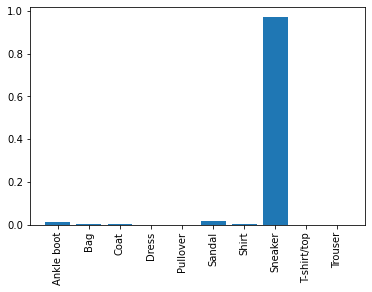

Do you wish to see performance on the next test image? y/ny


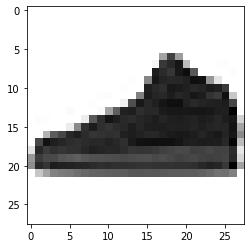

Actual value:  Sneaker   predicted value:  Sneaker
Predicted probability distribution:

p(0):  0.14 
p(1):  0.00 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.01 
p(6):  0.00 
p(7):  0.85 
p(8):  0.00 
p(9):  0.00 


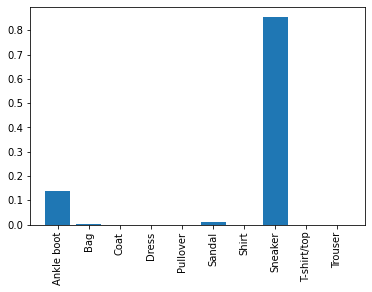

Do you wish to see performance on the next test image? y/ny


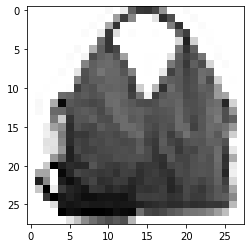

Actual value:  Bag   predicted value:  Bag
Predicted probability distribution:

p(0):  0.00 
p(1):  0.99 
p(2):  0.00 
p(3):  0.00 
p(4):  0.00 
p(5):  0.00 
p(6):  0.00 
p(7):  0.00 
p(8):  0.00 
p(9):  0.00 


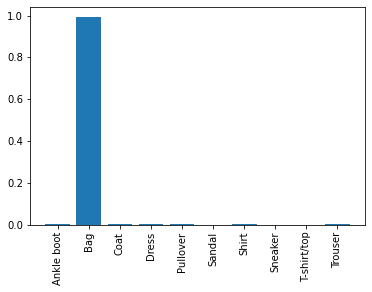

Do you wish to see performance on the next test image? y/nn


In [46]:
#For each image showing image, pred and true
for i in range(len(Y_test)):    
    if input("Do you wish to see performance on the next test image? y/n")=='n':       
        break    
    plt.imshow(np.array(X_test.iloc[i]).reshape((28,28)),cmap=plt.cm.binary)    
    plt.show()    
    print("Actual value: ",Y_test[i], "  predicted value: ", Y_pred[i])    
    print("Predicted probability distribution:\n")    
    [print("p(%d): %5.2f "% (j, Y_pred_prob[i,j])) for j in range(Y_pred_prob.shape[1])]    
    plt.bar(height=Y_pred_prob[i],x=name)
    plt.xticks(rotation = 90)
    plt.show()